# Business Recommendations

<b>Executive Summary</b>
 
<p>This report presents an analysis of the provided customer data to predict and reduce customer churn. It has identified key parameters that impact the customer churn rate using statistical tools. From this model, it can be identified potential strategies to reduce customer churn in the future by taking in consideration some parameters that have a direct effect on the customer churn ratios.</p> 
<p>From the results, it can be recommended several strategies from including encouraging customers to sign up for more extended contracts, offering incentives for credit card and automatic payments, promoting online backup services, offering promotions for good credit scores, improving the quality of our internet services, and increasing our focus on customer service.</p>
 
<b>Encourage Customers to Sign Up for Longer Contracts</b>
 
<p>One of the significant factors contributing to customer churn is the short-term contracts that many customers prefer. Encouraging customers to sign up for more extended contracts, such as two-year contracts, can increase customer loyalty and reduce churn. Indeed, according to a study by McKinsey & Company, customers who are on long-term contracts are 50% less likely to churn than those on short-term contracts (McKinsey & Company, 2018). We can offer incentives for customers who sign up for more extended agreements, such as discounted rates or bonus features. Additionally, we can promote the benefits of long-term contracts, such as guaranteed pricing, increased reliability, and free upgrades.</p>
 
<b>Offer Incentives for Credit Card and Automatic Payments<b>
 
<p>Missed payments are a common reason for customer churn, and according to a study by Aite Group, customers who use automatic payments are 16% less likely to churn than those who do not (Aite Group,2016). We can reduce this likelihood by offering incentives for customers who pay by credit card or use automatic payments. These incentives can be in cashback or discounts and rewards programs, encouraging customers to adopt these payment methods. By doing so, we can reduce the number of missed payments and increase customer loyalty.</p>
 
<b>Encourage Customers to Use Online Backup Services</b>
 
<p>Encouraging customers to use online backup services can effectively reduce customer churn resulting from data loss or service interruption. We can promote the benefits of using online backup services, such as increased data security and ease of access. Additionally, we can offer promotions or discounts for customers who adopt online backup services, such as free trials or additional storage.</p>
 
<b>Offer Promotions for Customers with Good Credit Scores</b>
 
<p>Customers with good credit scores are less likely to churn and more likely to become long-term customers. According to a study by TransUnion, customers with good credit scores are 33% less potential to churn than those with poor credit scores (TransUnion, 2019). We can offer special rewards programs or promotions to incentivize customers with good credit scores, such as reduced rates or additional services.</p>
 
<b>Improve the Quality and Reliability of Internet Services</b>

<p>Fiber optic and DSL internet services are critical for our customers, and any issues or interruptions can lead to churn. Improving the quality and reliability of our internet services can significantly reduce churn. We can consider upgrading our network infrastructure, improving customer service response time, and offering compensation for interruptions.</p>

# Initial Analysis of the data

<p>The provided dataset contains 26 columns and 8000 rows. Each row corresponds to a customer of a telecom company and each column provides a different piece of information about them, such as their gender, age, contract type, monthly charges, and whether or not they have churned (i.e., cancelled their service). The column names, non-null counts, and data types are also provided. Some columns have missing values, such as Senior Citizen, while others, such as Monthly Charges, have all their values present. </p>
<p>All of the columns have been converted into binary data with the exception of the column Surname and Customer ID that are unique for each customer and show up <b><u>2442 and 7043</u></b> respectively.</p>         
<p>The majority of the customers are situated in France, and the most frequently occurring contract is on a month-to-month basis, with the most prevalent payment method being electronic check.</p>
<p>The highest number of missing values are in 'Multiple Lines' (67) and the lowest number of missing values are in 'Monthly Charges' (32). The columns with missing values contain a mixture of data types, including floats, integers, and objects. There are 25 columns in total, with 'Churn', 'CustomerID', 'Dependents', 'Payment Method', and 'Charge' having no missing values. The missing values were replaced by the median of each of their corresponding columns.</p>
<p>Some columns have positive skewness (e.g. SeniorCitizen, Churn) indicating a longer tail on the positive side, while others have negative skewness (e.g. PhoneService, MonthlyCharges) indicating a longer tail on the negative side.</p>

<p>Overall, <b><u>73.6%</u></b> of the customers did not churn.</p>

# Import all the libraries

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler          # robust scaler
from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer


# Importing the File

In [2]:
#Importing the file 
path = "./A2.csv"

df_customer_o = pd.read_csv(path)

# Print dimensions of data
print(f"""
Size of Original Dataset
------------------------
Observations: {df_customer_o.shape[0]}
Features:     {df_customer_o.shape[1]}
""")



Size of Original Dataset
------------------------
Observations: 8000
Features:     27



# EDA and Data Cleaning 

In [3]:
#Performing EAD on data set.

df_customer_o.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,Geography,CreditScore,Surname,EstimatedSalary,MonthlyCharges,customerID,Dependents,PaymentMethod,Charge
0,0,Female,0.0,Yes,72.0,Yes,No,Fiber optic,Yes,Yes,...,No,Germany,602.0,Klein,45038.29,108.30,6519-ZHPXP,Yes,Bank transfer (automatic),108.30
1,1,Male,0.0,Yes,30.0,Yes,Yes,DSL,No,No,...,No,Germany,776.0,Lung,89893.60,49.90,1958-RNRKS,No,Electronic check,49.90
2,2,Male,0.0,Yes,49.0,No,No phone service,DSL,Yes,No,...,No,Germany,709.0,Lucciano,11.58,39.20,7989-AWGEH,Yes,Electronic check,39.20
3,3,Female,1.0,Yes,25.0,Yes,Yes,DSL,Yes,No,...,No,France,788.0,O'Brien,116978.19,69.50,6575-SUVOI,No,Credit card (automatic),69.50
4,4,Female,1.0,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,...,No,Germany,733.0,Medvedeva,177994.81,114.65,1779-PWPMG,No,Bank transfer (automatic),114.65


In [4]:
#removing the unnammed index column
df_customer = df_customer_o.drop(df_customer_o.columns[0], axis=1)
df_customer.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Geography,CreditScore,Surname,EstimatedSalary,MonthlyCharges,customerID,Dependents,PaymentMethod,Charge
0,Female,0.0,Yes,72.0,Yes,No,Fiber optic,Yes,Yes,Yes,...,No,Germany,602.0,Klein,45038.29,108.30,6519-ZHPXP,Yes,Bank transfer (automatic),108.30
1,Male,0.0,Yes,30.0,Yes,Yes,DSL,No,No,No,...,No,Germany,776.0,Lung,89893.60,49.90,1958-RNRKS,No,Electronic check,49.90
2,Male,0.0,Yes,49.0,No,No phone service,DSL,Yes,No,No,...,No,Germany,709.0,Lucciano,11.58,39.20,7989-AWGEH,Yes,Electronic check,39.20
3,Female,1.0,Yes,25.0,Yes,Yes,DSL,Yes,No,No,...,No,France,788.0,O'Brien,116978.19,69.50,6575-SUVOI,No,Credit card (automatic),69.50
4,Female,1.0,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,...,No,Germany,733.0,Medvedeva,177994.81,114.65,1779-PWPMG,No,Bank transfer (automatic),114.65


In [5]:
df_customer['Churn'].value_counts()

No     5839
Yes    2095
Name: Churn, dtype: int64

In [6]:
#converting total charges into float
df_customer['TotalCharges'] = pd.to_numeric(df_customer["TotalCharges"], errors = 'coerce')

In [7]:
#descriptive stats for float column
df_customer.describe().round(0)

,SeniorCitizen,tenure,TotalCharges,CreditScore,EstimatedSalary,MonthlyCharges,Charge
count,7954.0,7938.0,7947.0,7938.0,7951.0,7968.0,8000.0
mean,0.0,32.0,2289.0,650.0,100378.0,65.0,65.0
std,0.0,25.0,2269.0,97.0,57615.0,30.0,30.0
min,0.0,0.0,19.0,350.0,12.0,18.0,18.0
25%,0.0,9.0,401.0,581.0,50779.0,36.0,36.0
50%,0.0,29.0,1405.0,651.0,100557.0,71.0,71.0
75%,0.0,56.0,3806.0,717.0,149401.0,90.0,90.0
max,1.0,72.0,8685.0,850.0,199992.0,119.0,119.0


In [8]:
#desciptive stats for string columns
df_customer.describe(include='object')

,gender,Partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Churn,Geography,Surname,customerID,Dependents,PaymentMethod
count,7938,7952,7947,7933,7944,7941,7960,7953,7954,7950,7947,7952,7952,7934,7948,7942,8000,8000,8000
unique,2,2,2,3,3,3,3,3,3,3,3,3,2,2,3,2442,7043,2,4
top,Male,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,No,France,Shih,9959-WOFKT,No,Electronic check
freq,4013,4111,7184,3811,3524,3953,3483,3502,3917,3175,3129,4377,4718,5839,3982,24,2,5588,2661


In [9]:
df_customer['Churn'] = df_customer['Churn'].replace({"Yes": 1, "No": 0})
df_customer['Churn'].value_counts()

0.0    5839
1.0    2095
Name: Churn, dtype: int64

In [10]:
#converting total charges into float
df_customer['TotalCharges'] = pd.to_numeric(df_customer["TotalCharges"], errors = 'coerce')
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7938 non-null   object 
 1   SeniorCitizen     7954 non-null   float64
 2   Partner           7952 non-null   object 
 3   tenure            7938 non-null   float64
 4   PhoneService      7947 non-null   object 
 5   MultipleLines     7933 non-null   object 
 6   InternetService   7944 non-null   object 
 7   OnlineSecurity    7941 non-null   object 
 8   OnlineBackup      7960 non-null   object 
 9   DeviceProtection  7953 non-null   object 
 10  TechSupport       7954 non-null   object 
 11  StreamingTV       7950 non-null   object 
 12  StreamingMovies   7947 non-null   object 
 13  Contract          7952 non-null   object 
 14  PaperlessBilling  7952 non-null   object 
 15  TotalCharges      7947 non-null   float64
 16  Churn             7934 non-null   float64


In [11]:
#dropping the blank rows from the churn column
df_customer = df_customer.dropna(subset=['Churn'])
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7872 non-null   object 
 1   SeniorCitizen     7888 non-null   float64
 2   Partner           7886 non-null   object 
 3   tenure            7872 non-null   float64
 4   PhoneService      7881 non-null   object 
 5   MultipleLines     7867 non-null   object 
 6   InternetService   7881 non-null   object 
 7   OnlineSecurity    7875 non-null   object 
 8   OnlineBackup      7894 non-null   object 
 9   DeviceProtection  7887 non-null   object 
 10  TechSupport       7888 non-null   object 
 11  StreamingTV       7884 non-null   object 
 12  StreamingMovies   7882 non-null   object 
 13  Contract          7886 non-null   object 
 14  PaperlessBilling  7887 non-null   object 
 15  TotalCharges      7881 non-null   float64
 16  Churn             7934 non-null   float64


In [12]:
#checking total blanks per column
df_customer.isna().sum()

gender              62
SeniorCitizen       46
Partner             48
tenure              62
PhoneService        53
MultipleLines       67
InternetService     53
OnlineSecurity      59
OnlineBackup        40
DeviceProtection    47
TechSupport         46
StreamingTV         50
StreamingMovies     52
Contract            48
PaperlessBilling    47
TotalCharges        53
Churn                0
Geography           51
CreditScore         60
Surname             57
EstimatedSalary     49
MonthlyCharges      32
customerID           0
Dependents           0
PaymentMethod        0
Charge               0
dtype: int64

In [13]:
median = df_customer.SeniorCitizen.median()
#Filling the senior citizen blanks with median
df_customer['SeniorCitizen'] = df_customer['SeniorCitizen'].fillna(median) 
#checking total blanks per column
df_customer.isna().sum()

gender              62
SeniorCitizen        0
Partner             48
tenure              62
PhoneService        53
MultipleLines       67
InternetService     53
OnlineSecurity      59
OnlineBackup        40
DeviceProtection    47
TechSupport         46
StreamingTV         50
StreamingMovies     52
Contract            48
PaperlessBilling    47
TotalCharges        53
Churn                0
Geography           51
CreditScore         60
Surname             57
EstimatedSalary     49
MonthlyCharges      32
customerID           0
Dependents           0
PaymentMethod        0
Charge               0
dtype: int64

In [14]:
#Converting the gender column into integer 1 and 0
gender_dict = {'Male': 1, 'Female': 0}
df_customer['gender'] = df_customer['gender'].replace(gender_dict)
#filling the null values with Male
df_customer['gender'] = df_customer['gender'].fillna(1)
df_customer['gender'].value_counts(dropna=False)

1.0    4039
0.0    3895
Name: gender, dtype: int64

In [15]:
#Converting the Partner column into integer 1 and 0
bool_dict = {'Yes': 1, 'No': 0}
df_customer['Partner'] = df_customer['Partner'].replace(bool_dict)
#filling the null values with No
df_customer['Partner'] = df_customer['Partner'].fillna(0)
df_customer['Partner'].value_counts(dropna=False)

0.0    4128
1.0    3806
Name: Partner, dtype: int64

In [16]:
#Converting the PhoneService column into integer 1 and 0
df_customer['PhoneService'] = df_customer['PhoneService'].replace(bool_dict)

#filling the null values with Yes
df_customer['PhoneService'] = df_customer['PhoneService'].fillna(1)
df_customer['PhoneService'].value_counts(dropna=False)

1.0    7174
0.0     760
Name: PhoneService, dtype: int64

In [17]:
#Converting the PaperlessBilling column into integer 1 and 0
df_customer['PaperlessBilling'] = df_customer['PaperlessBilling'].replace(bool_dict)

#filling the null values with Yes
df_customer['PaperlessBilling'] = df_customer['PaperlessBilling'].fillna(1)
df_customer['PaperlessBilling'].value_counts(dropna=False)

1.0    4727
0.0    3207
Name: PaperlessBilling, dtype: int64

In [18]:
#Converting the Dependents column into integer 1 and 0
df_customer['Dependents'] = df_customer['Dependents'].replace(bool_dict)

#filling the null values with No
df_customer['Dependents'] = df_customer['Dependents'].fillna(0)
df_customer['Dependents'].value_counts(dropna=False)

0    5545
1    2389
Name: Dependents, dtype: int64

In [19]:
#replacing the blank values from the numerical columns with their mean
num_cols = ['tenure', 'CreditScore', 'EstimatedSalary', 'TotalCharges', 'MonthlyCharges', 'Charge']
for col in num_cols:
    median = df_customer[col].median()
    df_customer[col] = df_customer[col].fillna(median)

df_customer.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
tenure               0
PhoneService         0
MultipleLines       67
InternetService     53
OnlineSecurity      59
OnlineBackup        40
DeviceProtection    47
TechSupport         46
StreamingTV         50
StreamingMovies     52
Contract            48
PaperlessBilling     0
TotalCharges         0
Churn                0
Geography           51
CreditScore          0
Surname             57
EstimatedSalary      0
MonthlyCharges       0
customerID           0
Dependents           0
PaymentMethod        0
Charge               0
dtype: int64

In [20]:
#filling the remaing blank categorcal columns with the value that has maximum occarance
cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'Geography']
for col in cat_cols:
    mode = df_customer[col].mode().values[0]
    df_customer[col] = df_customer[col].fillna(mode)


In [21]:
#dropping Total Charges, Surname, MonthlyCharges and customerID from the dataframe
df_customer = df_customer.drop(['Charge', 'Surname', 'customerID'], axis=1)

In [22]:
#converting the datatypes of columns with 1 and 0 to int
cols = ['gender', 'Partner', 'PhoneService','PaperlessBilling', 'Dependents', 'SeniorCitizen', 'Churn']
for col in cols:
    df_customer[col] = df_customer[col].astype(int)

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7934 non-null   int32  
 1   SeniorCitizen     7934 non-null   int32  
 2   Partner           7934 non-null   int32  
 3   tenure            7934 non-null   float64
 4   PhoneService      7934 non-null   int32  
 5   MultipleLines     7934 non-null   object 
 6   InternetService   7934 non-null   object 
 7   OnlineSecurity    7934 non-null   object 
 8   OnlineBackup      7934 non-null   object 
 9   DeviceProtection  7934 non-null   object 
 10  TechSupport       7934 non-null   object 
 11  StreamingTV       7934 non-null   object 
 12  StreamingMovies   7934 non-null   object 
 13  Contract          7934 non-null   object 
 14  PaperlessBilling  7934 non-null   int32  
 15  TotalCharges      7934 non-null   float64
 16  Churn             7934 non-null   int32  


In [23]:
#checking the skewness of the dataframe
df_customer.skew().round(2)

C:\Users\sharm\AppData\Local\Temp\ipykernel_28056\4245993104.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_customer.skew().round(2)


gender             -0.04
SeniorCitizen       1.85
Partner             0.08
tenure              0.25
PhoneService       -2.75
PaperlessBilling   -0.39
TotalCharges        0.97
Churn               1.07
CreditScore        -0.06
EstimatedSalary    -0.01
MonthlyCharges     -0.23
Dependents          0.87
dtype: float64

In [24]:
#checking the pct distribution of churn and no churn in the dataframe

count_no_churn = len(df_customer[df_customer['Churn']==0])
count_churn = len(df_customer[df_customer['Churn']==1])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is", round(pct_of_no_churn*100,2))
pct_of_churn = count_churn/(count_no_churn+count_churn)
print("percentage of churn", round(pct_of_churn*100,2))

percentage of no churn is 73.59
percentage of churn 26.41


In [25]:
# look at the average for both cases
df_customer.groupby('Churn').mean().round(2)

,gender,SeniorCitizen,Partner,tenure,PhoneService,PaperlessBilling,TotalCharges,CreditScore,EstimatedSalary,MonthlyCharges,Dependents
Churn,,,,,,,,,,,
0,0.51,0.13,0.52,37.47,0.90,0.54,2553.12,648.92,99474.34,61.65,0.35
1,0.50,0.25,0.36,17.91,0.91,0.75,1521.89,651.46,102928.12,74.49,0.18


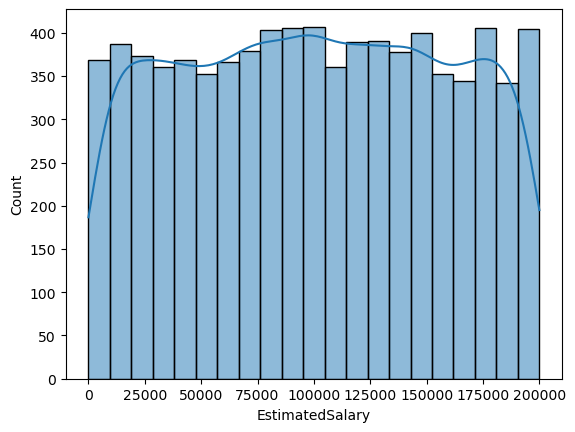

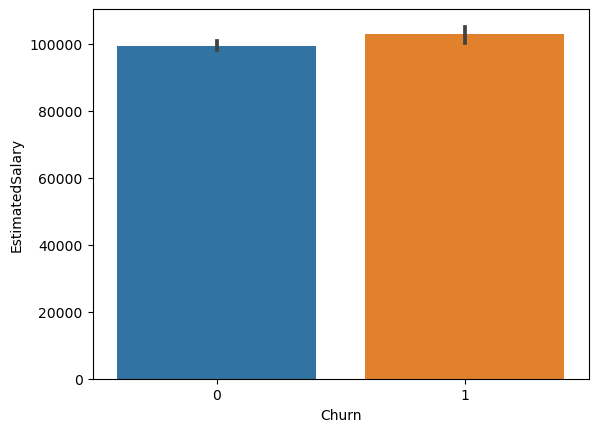

In [26]:
# histogram for Estimated Salary
sns.histplot(data   = df_customer,
             x      = 'EstimatedSalary',
             kde    = True)
plt.show()

#bargraph for estimated salary vs churn

sns.barplot(data = df_customer,
            x= "Churn",
            y= "EstimatedSalary"   )

plt.show()

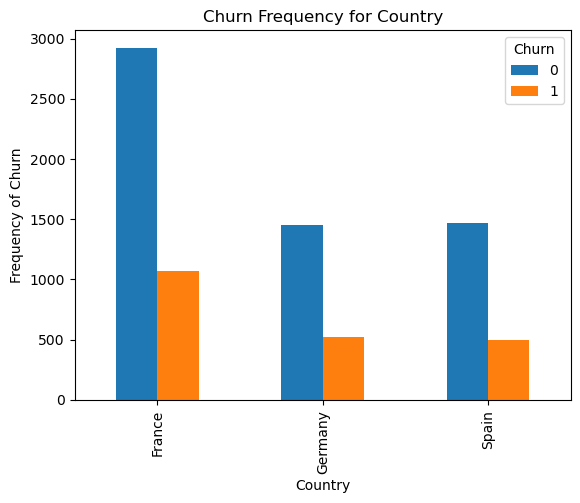

In [27]:
# look at churn frequency by country
%matplotlib inline
pd.crosstab(df_customer.Geography,df_customer.Churn).plot(kind='bar')
plt.title('Churn Frequency for Country')
plt.xlabel('Country')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_per_country')

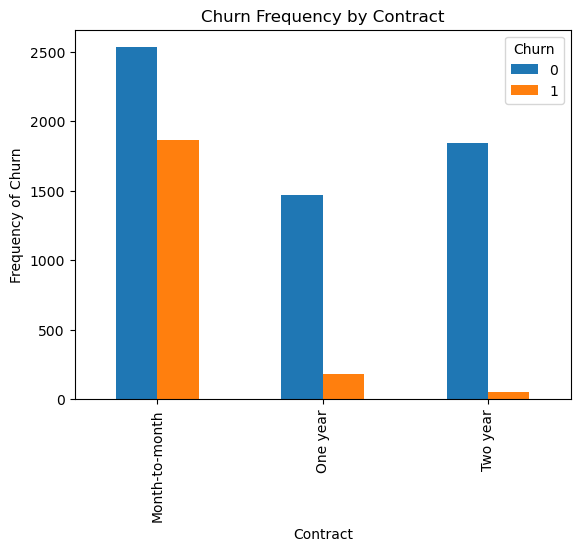

In [28]:
# look at churn frequency by contract
%matplotlib inline
pd.crosstab(df_customer.Contract,df_customer.Churn).plot(kind='bar')
plt.title('Churn Frequency by Contract')
plt.xlabel('Contract')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_per_Contract_type')

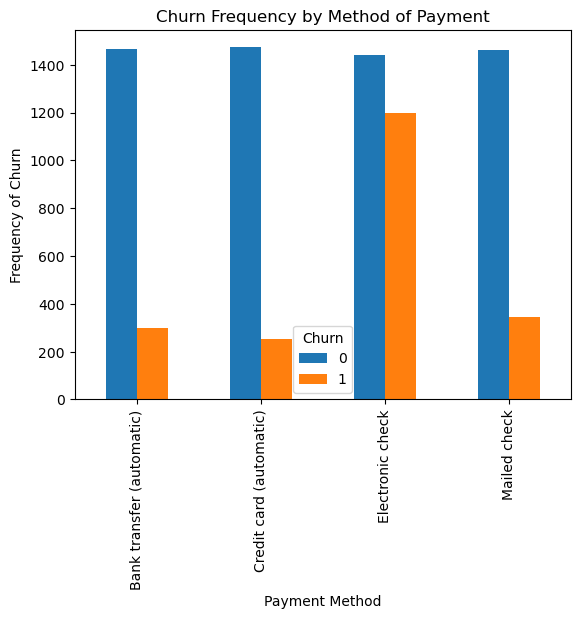

In [29]:
# look at churn frequency by payment method
%matplotlib inline
pd.crosstab(df_customer.PaymentMethod,df_customer.Churn).plot(kind='bar')
plt.title('Churn Frequency by Method of Payment')
plt.xlabel('Payment Method')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_by_Payment_Method')

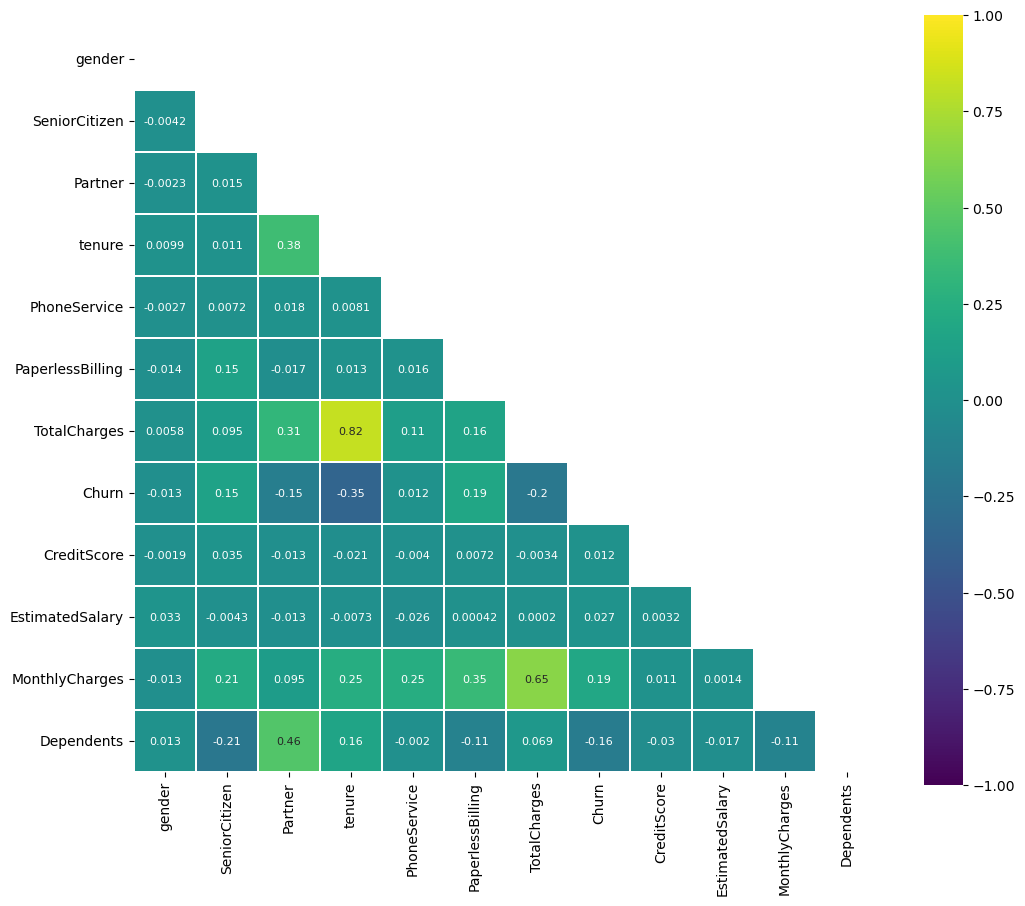

In [30]:
corr = df_customer.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr,
            cmap='viridis',
            mask=mask,
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True);

In [31]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7934 non-null   int32  
 1   SeniorCitizen     7934 non-null   int32  
 2   Partner           7934 non-null   int32  
 3   tenure            7934 non-null   float64
 4   PhoneService      7934 non-null   int32  
 5   MultipleLines     7934 non-null   object 
 6   InternetService   7934 non-null   object 
 7   OnlineSecurity    7934 non-null   object 
 8   OnlineBackup      7934 non-null   object 
 9   DeviceProtection  7934 non-null   object 
 10  TechSupport       7934 non-null   object 
 11  StreamingTV       7934 non-null   object 
 12  StreamingMovies   7934 non-null   object 
 13  Contract          7934 non-null   object 
 14  PaperlessBilling  7934 non-null   int32  
 15  TotalCharges      7934 non-null   float64
 16  Churn             7934 non-null   int32  


In [32]:
df_customer['OnlineSecurity'].value_counts()

No                     3983
Yes                    2264
No internet service    1687
Name: OnlineSecurity, dtype: int64

# Linear Regression - Without Feature Engineering

## Model 1 - Basic Linear Regression

### Creating a Model

In [33]:
# x-variables

x_var = ['gender',
         'SeniorCitizen',
         'Partner',
         'tenure',
         'PhoneService',
         #'MultipleLines',
         #'InternetService',
         #'OnlineSecurity',
         #'DeviceProtection',
         #'TechSupport',
         #'StreamingTV',
         #'StreamingMovies',
         #'Contract',
         'PaperlessBilling',
         #'Geography',
         'CreditScore',
         'EstimatedSalary',
         'Dependents',
         #'PaymentMethod',
         'TotalCharges' ]

In [34]:
y_data = df_customer.loc[ : , 'Churn']
x_data = df_customer.loc[ : , x_var]

In [35]:
#Splitting training and test-data

x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 210)

In [36]:
# Model initialization
linear_model = LinearRegression()

# Fit the data(train the model)
linear_model.fit(x_train, y_train)

LinearRegression()

### Prediction

In [37]:
# Prediction model
y_predicted = linear_model.predict(x_test)

### Model Evaluation

In [38]:
# model evaluation
rmse_linear = mean_squared_error(y_test, y_predicted).round(3)
r2_linear = r2_score(y_test, y_predicted).round(3)

# printing values
print('Slope:' ,linear_model.coef_.round(decimals = 2))
print('Intercept:', linear_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse_linear)
print('R2 score: ', r2_linear)

Slope: [-0.    0.12  0.01 -0.01 -0.01  0.12 -0.    0.   -0.06  0.  ]
Intercept: 0.4
Root mean squared error:  0.152
R2 score:  0.196


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

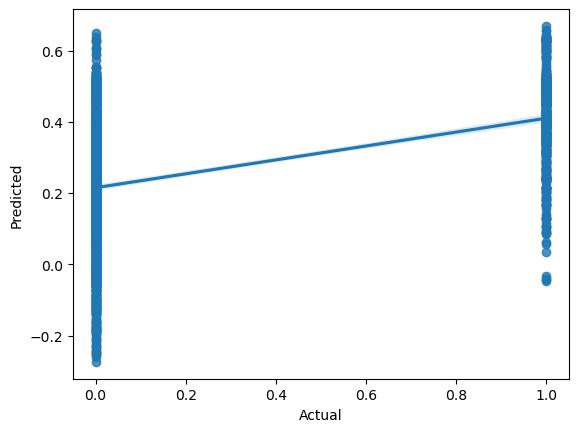

In [39]:
output = pd.DataFrame({'Actual': y_test,
                       'Predicted': y_predicted})
sns.regplot(x="Actual", y="Predicted", data=output)

## Linear Regression - Ordinal Encoding

### Creating a Model

In [40]:
# x-variables

x_var_oe = ['gender',
         'SeniorCitizen',
         'Partner',
         'tenure',
         'PhoneService',
         'MultipleLines',
         'InternetService',
         'OnlineSecurity',
         'DeviceProtection',
         'TechSupport',
         'StreamingTV',
         'StreamingMovies',
         'Contract',
         'PaperlessBilling',
         'Geography',
         'CreditScore',
         'EstimatedSalary',
         'Dependents',
         'PaymentMethod',
         'TotalCharges' ]

y_data_oe = df_customer.loc[ : , 'Churn']
x_data_oe = df_customer.loc[ : , x_var_oe]

#Ordinal Encoding the categorical columns

s = (x_data_oe.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
x_data_oe[object_cols] = ordinal_encoder.fit_transform(x_data_oe[object_cols])

#Splitting training and test-data

x_train_oe, x_test_oe, y_train_oe, y_test_oe = train_test_split(
            x_data_oe, # x-variables (can change this)
            y_data_oe, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 210)

# Model initialization
linear_oe_model = LinearRegression()

# Fit the data(train the model)
linear_oe_model.fit(x_train_oe, y_train_oe)

LinearRegression()

### Prediction

In [41]:
y_predicted_oe = linear_oe_model.predict(x_test_oe)

### Model Evaluation

In [42]:
# model evaluation
rmse_linear_oe = mean_squared_error(y_test_oe, y_predicted_oe).round(3)
r2_linear_oe = r2_score(y_test_oe, y_predicted_oe).round(3)

# printing values
print('Slope:' ,linear_oe_model.coef_.round(decimals = 2))
print('Intercept:', linear_oe_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse_linear_oe)
print('R2 score: ', r2_linear_oe)

Slope: [-0.01  0.06  0.01 -0.01  0.    0.04 -0.01 -0.06 -0.02 -0.06  0.02  0.02
 -0.07  0.07 -0.   -0.    0.   -0.04 -0.    0.  ]
Intercept: 0.44
Root mean squared error:  0.146
R2 score:  0.23


## Linear Regression - One-Hot Encoding

### Creating a Model

In [43]:
# x-variables

x_var_ohe = ['gender',
         'SeniorCitizen',
         'Partner',
         'tenure',
         'PhoneService',
         'MultipleLines',
         'InternetService',
         'OnlineSecurity',
         'DeviceProtection',
         'TechSupport',
         'StreamingTV',
         'StreamingMovies',
         'Contract',
         'PaperlessBilling',
         'Geography',
         'CreditScore',
         'EstimatedSalary',
         'Dependents',
         'PaymentMethod',
         'TotalCharges' ]

y_data_ohe = df_customer.loc[ : , 'Churn']
x_data_ohe = df_customer.loc[ : , x_var_ohe]

#creating a list of column names for all the categorical columns 
s = (x_data.dtypes == 'object')
object_cols_ohe = list(s[s].index)

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data_ohe[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = x_data_ohe.index

# Ensure we have proper column names
OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)


# Remove categorical columns (will replace with one-hot encoding)
num_X = x_data_ohe.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)


#Splitting training and test-data
x_train_ohe, x_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
            OH_X, # x-variables (can change this)
            y_data_ohe, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 210)

# Model initialization

linear_ohe_model = LinearRegression()

# Fit the data(train the model)
linear_ohe_model.fit(x_train_ohe, y_train_ohe)

LinearRegression()

### Prediction

In [44]:
y_predicted_ohe = linear_ohe_model.predict(x_test_ohe)

### Model Evaluation

In [45]:
# model evaluation
rmse_linear_ohe = mean_squared_error(y_test_ohe, y_predicted_ohe).round(3)
r2_linear_ohe = r2_score(y_test_ohe, y_predicted_ohe).round(3)

# printing values
print('Slope:' ,linear_ohe_model.coef_.round(decimals = 2))
print('Intercept:', linear_ohe_model.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse_linear_ohe)
print('R2 score: ', r2_linear_ohe)

Slope: [-0.    0.04  0.   -0.    0.06  0.04 -0.    0.   -0.02 -0.   -0.05  0.05
  0.   -0.11  0.07  0.03  0.03 -0.01 -0.02  0.05 -0.1   0.05  0.06 -0.05
 -0.01 -0.04  0.02  0.01 -0.   -0.04  0.04  0.06 -0.05 -0.01 -0.    0.01
 -0.01 -0.01 -0.02  0.05 -0.02]
Intercept: 0.29
Root mean squared error:  0.138
R2 score:  0.271


## Linear Regression - Without Feature Engineering Results

In [46]:
lin_m_e = {'Method': ['Only Numerical', 'Ordinal Encoding', 'One-Hot Encoding'], 
           'R2 Score': [r2_linear, r2_linear_oe, r2_linear_ohe],
           'RMSE': [rmse_linear, rmse_linear_oe, rmse_linear_ohe] }

df_linear_model_evaluation = pd.DataFrame(lin_m_e)
df_linear_model_evaluation

,Method,R2 Score,RMSE
0,Only Numerical,0.196,0.152
1,Ordinal Encoding,0.230,0.146
2,One-Hot Encoding,0.271,0.138


# Logistic Regression - Without Feature Engineering

## Basic Logistic Regression

### Creating a Model

In [47]:
# x-variables

x_var_ohe = ['gender',
         'SeniorCitizen',
         'Partner',
         'tenure',
         'PhoneService',
         'MultipleLines',
         'InternetService',
         'OnlineSecurity',
         'DeviceProtection',
         'TechSupport',
         'StreamingTV',
         'StreamingMovies',
         'Contract',
         'PaperlessBilling',
         'Geography',
         'CreditScore',
         'EstimatedSalary',
         'Dependents',
         'PaymentMethod',
         'TotalCharges' ]

y_data_ohe = df_customer.loc[ : , 'Churn']
x_data_ohe = df_customer.loc[ : , x_var_ohe]

#creating a list of column names for all the categorical columns 
s = (x_data.dtypes == 'object')
object_cols_ohe = list(s[s].index)

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data_ohe[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = x_data_ohe.index

# Ensure we have proper column names
OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)


# Remove categorical columns (will replace with one-hot encoding)
num_X = x_data_ohe.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)


#Splitting training and test-data
x_train_ohe, x_test_ohe, y_train_ohe, y_test_ohe = train_test_split(
            OH_X, # x-variables (can change this)
            y_data_ohe, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 210)

#creating the model

logreg_model = LogisticRegression()

#checking the fit of model

logreg_model.fit(x_train_ohe, y_train_ohe)

LogisticRegression()

### Prediction

In [48]:
# Predict
y_predicted_lr = logreg_model.predict(x_test_ohe)

### Model Evaluation

In [49]:
# model evaluation

#checking accuracy of model

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_model.score(x_test_ohe, y_test_ohe)))

#confusion matrix
conf_m_logreg = confusion_matrix(y_test_ohe, y_predicted_lr)
print("\nConfusion Matrix: \n")
print(conf_m_logreg)

#classification matrix
classif_report_logreg = classification_report(y_test_ohe, y_predicted_lr)
print("\nClassification Report \n")
print(classif_report_logreg)

#getting the f1-scores 

classif_report_logreg = classification_report(y_test_ohe, y_predicted_lr, output_dict=True)
f1_score_active = classif_report_logreg['0']['f1-score']
f1_score_churn = classif_report_logreg['1']['f1-score']


Accuracy of logistic regression classifier on test set: 0.78

Confusion Matrix: 

[[1359  123]
 [ 314  188]]

Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1482
           1       0.60      0.37      0.46       502

    accuracy                           0.78      1984
   macro avg       0.71      0.65      0.66      1984
weighted avg       0.76      0.78      0.76      1984



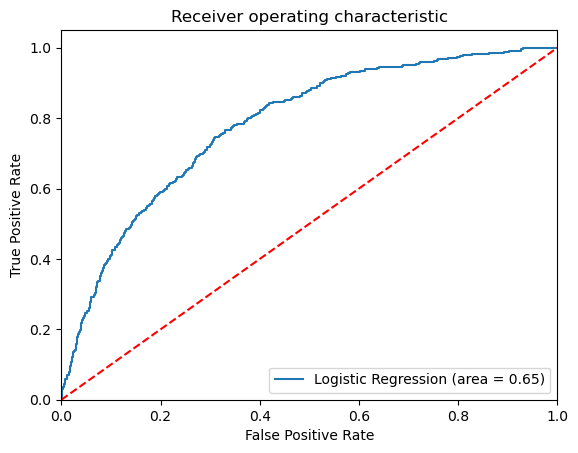

In [50]:
#ROC-AUC chart

logit_roc_auc = roc_auc_score(y_test_ohe, logreg_model.predict(x_test_ohe))
fpr, tpr, thresholds = roc_curve(y_test_ohe, logreg_model.predict_proba(x_test_ohe)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Logestic Regression - Scaling

### Creating a Model

In [51]:
# scaling the data

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train_ohe)
x_test_sc = sc.transform(x_test_ohe)

# creating the scaled model

logreg_model_sc = LogisticRegression()

#training the data 

logreg_model_sc.fit(x_train_sc, y_train_ohe)

LogisticRegression()

### Prediction

In [52]:
y_predicted_sc = logreg_model_sc.predict(x_test_sc)

### Model Evaluation

In [53]:
#Model Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_model_sc.score(x_test_sc, y_test_ohe)))

#confusion matrix
conf_m_logreg_sc = confusion_matrix(y_test_ohe, y_predicted_sc)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_sc)

#classification matrix
classif_report_logreg_sc = classification_report(y_test_ohe, y_predicted_sc)
print("\nClassification Report \n")
print(classif_report_logreg_sc)

#getting the f1-scores 

classif_report_logreg_sc = classification_report(y_test_ohe, y_predicted_sc, output_dict=True)
f1_score_sc_active = classif_report_logreg_sc['0']['f1-score']
f1_score_sc_churn = classif_report_logreg_sc['1']['f1-score']



Accuracy of logistic regression classifier on test set: 0.80

Confusion Matrix: 

[[1313  169]
 [ 221  281]]

Classification Report 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1482
           1       0.62      0.56      0.59       502

    accuracy                           0.80      1984
   macro avg       0.74      0.72      0.73      1984
weighted avg       0.80      0.80      0.80      1984



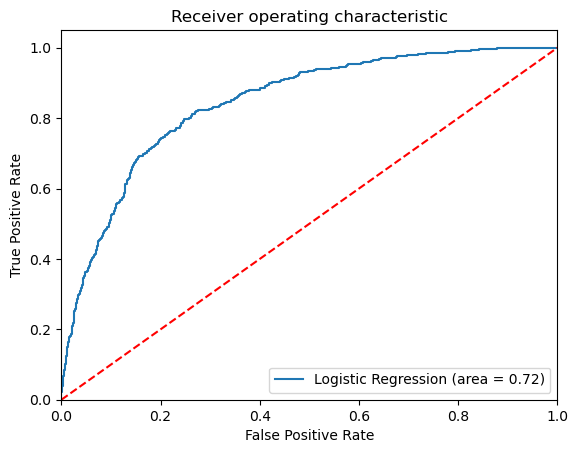

In [54]:
logit_roc_auc_sc = roc_auc_score(y_test_ohe, logreg_model_sc.predict(x_test_sc))
fpr, tpr, thresholds = roc_curve(y_test_ohe, logreg_model_sc.predict_proba(x_test_sc)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_sc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Logestic Regression - Balancing the classes using SMOTE

### Creating Model

In [55]:
#creating the column list for OH_x
x_ohe_cols = OH_X.columns.tolist()

In [56]:
# creating SMOTE Model on the scaled variables

os = SMOTE(random_state=0)

os_data_x,os_data_y = os.fit_resample(x_train_ohe, y_train_ohe)
os_data_x = pd.DataFrame(data = os_data_x,
                         columns = x_ohe_cols )
os_data_y= pd.DataFrame(data=os_data_y,
                        columns=['Churn'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of active customer in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churned customer",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of active customer in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_x))
print("Proportion of churned customer in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_x))

length of oversampled data is  8714
Number of active customer in oversampled data 4357
Number of churned customer 4357
Proportion of active customer in oversampled data is  0.5
Proportion of churned customer in oversampled data is  0.5


In [57]:
os_data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     8714 non-null   int32  
 1   SeniorCitizen              8714 non-null   int32  
 2   Partner                    8714 non-null   int32  
 3   tenure                     8714 non-null   float64
 4   PhoneService               8714 non-null   int32  
 5   PaperlessBilling           8714 non-null   int32  
 6   CreditScore                8714 non-null   float64
 7   EstimatedSalary            8714 non-null   float64
 8   Dependents                 8714 non-null   int32  
 9   TotalCharges               8714 non-null   float64
 10  No                         8714 non-null   float64
 11  No phone service           8714 non-null   float64
 12  Yes                        8714 non-null   float64
 13  DSL                        8714 non-null   float

In [58]:
os_data_y.value_counts()

Churn
0        4357
1        4357
dtype: int64

In [59]:
logreg_model_smote = LogisticRegression()
logreg_model_smote.fit(os_data_x, os_data_y.values.ravel())

LogisticRegression()

### Prediction

In [60]:
y_predicted_smote = logreg_model_smote.predict(x_test_ohe)

### Model Evaluation

In [61]:
#Model Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_model_smote.score(x_test_ohe, y_test_ohe)))

#confusion matrix
conf_m_logreg_smote = confusion_matrix(y_test_ohe, y_predicted_smote)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_sc)

#classification matrix
classif_report_logreg_smote = classification_report(y_test_ohe, y_predicted_smote)
print("\nClassification Report \n")
print(classif_report_logreg_smote)

#getting the f1-scores 


classif_report_logreg_smote = classification_report(y_test_ohe, y_predicted_smote, output_dict=True)

f1_score_smote_active = classif_report_logreg_smote['0']['f1-score']
f1_score_smote_churn = classif_report_logreg_smote['1']['f1-score']




Accuracy of logistic regression classifier on test set: 0.76

Confusion Matrix: 

[[1313  169]
 [ 221  281]]

Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1482
           1       0.52      0.78      0.62       502

    accuracy                           0.76      1984
   macro avg       0.71      0.77      0.72      1984
weighted avg       0.81      0.76      0.77      1984



In [62]:
print(logreg_model_smote.score(x_test_ohe, y_test_ohe))

0.7585685483870968


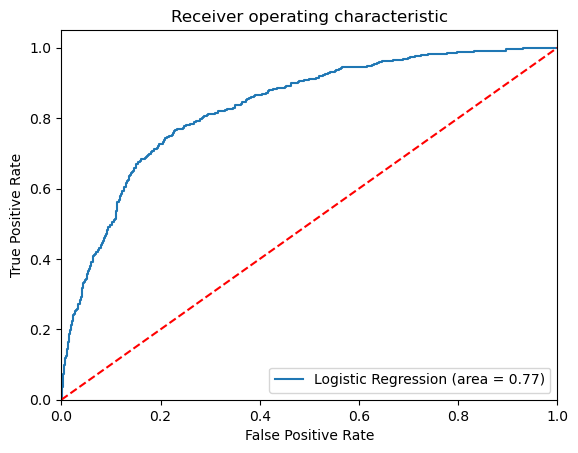

In [63]:
logit_roc_auc_smote = roc_auc_score(y_test_ohe, logreg_model_smote.predict(x_test_ohe))
fpr, tpr, thresholds = roc_curve(y_test_ohe, logreg_model_smote.predict_proba(x_test_ohe)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_smote)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Logistic Regression - Without Feature Engineering Results

In [64]:
accuracy_logreg = round(logreg_model.score(x_test_ohe, y_test_ohe),2)
accuracy_logreg_sc = round(logreg_model_sc.score(x_test_sc, y_test_ohe),2)
accuracy_logreg_smote = round(logreg_model_smote.score(x_test_ohe, y_test_ohe),2)


logr_m_e = {'Method': ['Basic', 'Scaled', 'SMOTE'],
            'F1-Score(Active)': [round(f1_score_active,2), round(f1_score_sc_active,2), round(f1_score_smote_active,2)], 
            'F1-Score(Churn)': [round(f1_score_churn,2), round(f1_score_sc_churn,2), round(f1_score_smote_churn,2)],
            'Accuracy': [accuracy_logreg, accuracy_logreg_sc, accuracy_logreg_smote],
            'Logistic Regression (area)': [round(logit_roc_auc,2), round(logit_roc_auc_sc,2), round(logit_roc_auc_smote,2)]
           }
df_logistic_model_evaluation = pd.DataFrame(logr_m_e)
df_logistic_model_evaluation

,Method,F1-Score(Active),F1-Score(Churn),Accuracy,Logistic Regression (area)
0,Basic,0.86,0.46,0.78,0.65
1,Scaled,0.87,0.59,0.80,0.72
2,SMOTE,0.82,0.62,0.76,0.77


# Feature Importance

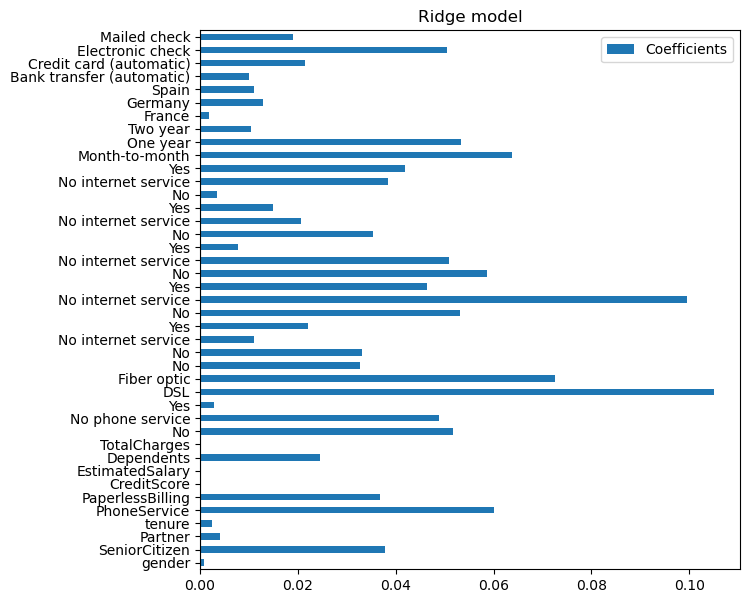

In [65]:
coefs = pd.DataFrame(
   np.abs(linear_ohe_model.coef_),
   columns=['Coefficients'], index=OH_X.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

## Scaleing in order to better compare the features

In [66]:
scaled_model = make_pipeline(StandardScaler(), LinearRegression())

scaled_model.fit(x_train_ohe, y_train_ohe)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

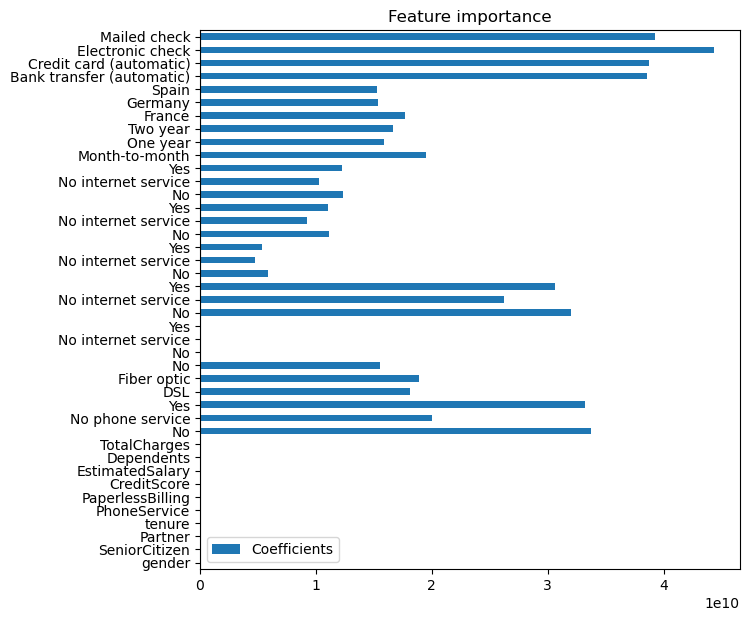

In [67]:
coefs = pd.DataFrame(
   np.abs(scaled_model[1].coef_),
   columns=['Coefficients'], index=OH_X.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Feature Engineering

In [68]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7934 non-null   int32  
 1   SeniorCitizen     7934 non-null   int32  
 2   Partner           7934 non-null   int32  
 3   tenure            7934 non-null   float64
 4   PhoneService      7934 non-null   int32  
 5   MultipleLines     7934 non-null   object 
 6   InternetService   7934 non-null   object 
 7   OnlineSecurity    7934 non-null   object 
 8   OnlineBackup      7934 non-null   object 
 9   DeviceProtection  7934 non-null   object 
 10  TechSupport       7934 non-null   object 
 11  StreamingTV       7934 non-null   object 
 12  StreamingMovies   7934 non-null   object 
 13  Contract          7934 non-null   object 
 14  PaperlessBilling  7934 non-null   int32  
 15  TotalCharges      7934 non-null   float64
 16  Churn             7934 non-null   int32  


In [69]:
#creating new dummy variables
df_customer['multiple_lines'] = 0
df_customer['single_lines'] = 0
df_customer['fiber_optic'] = 0
df_customer['dsl'] = 0
df_customer["no_internet_service"] = 0
df_customer["with_online_sec"] = 0
df_customer['wo_online_sec'] = 0
df_customer['with_online_bkp'] = 0
df_customer['wo_online_bkp'] = 0
df_customer['with_device_protection'] = 0
df_customer['wo_device_protection'] = 0
df_customer['with_tech_support'] = 0
df_customer['wo_tech_support'] = 0
df_customer['with_streaming_tv'] = 0
df_customer['wo_streaming_tv'] = 0
df_customer['with_streaming_movies'] = 0
df_customer['wo_streaming_movies'] = 0
df_customer['month_to_month'] = 0
df_customer['two_year'] = 0
df_customer['one_year'] = 0
df_customer['France'] = 0
df_customer['Germany'] = 0
df_customer['Spain'] = 0
df_customer['Electronic'] = 0
df_customer['Mailed'] = 0
df_customer['Bank_Transfer'] = 0
df_customer['Credit_card'] = 0



In [70]:
df_customer['Contract'].value_counts()

Month-to-month    4394
Two year          1890
One year          1650
Name: Contract, dtype: int64

In [71]:
for index, value in df_customer.iterrows():
    if df_customer.loc[index, 'MultipleLines'] == "Yes":
        df_customer.loc[index, 'multiple_lines'] = 1
    
    if df_customer.loc[index, 'MultipleLines'] == "No":
        df_customer.loc[index, 'single_lines'] = 1
    
    if df_customer.loc[index, 'InternetService'] == "Fiber optic":
        df_customer.loc[index, 'fiber_optic'] = 1
    
    if df_customer.loc[index, 'InternetService'] == "DSL":
        df_customer.loc[index, 'dsl'] = 1
        
    if df_customer.loc[index, 'InternetService'] == "No":
        df_customer.loc[index, 'no_internet_service'] = 1
    
    if df_customer.loc[index, 'OnlineSecurity'] == "Yes":
        df_customer.loc[index, 'with_online_sec'] = 1
        
    if df_customer.loc[index, 'OnlineSecurity'] == "No":
        df_customer.loc[index, 'wo_online_sec'] = 1
        
    if df_customer.loc[index, 'OnlineBackup'] == "Yes":
        df_customer.loc[index, 'with_online_bkp'] = 1
        
    if df_customer.loc[index, 'OnlineBackup'] == "No":
        df_customer.loc[index, 'wo_online_bkp'] = 1
        
    if df_customer.loc[index, 'DeviceProtection'] == "Yes":
        df_customer.loc[index, 'with_device_protection'] = 1
    
    if df_customer.loc[index, 'DeviceProtection'] == "No":
        df_customer.loc[index, 'wo_device_protection'] = 1

    if df_customer.loc[index, 'TechSupport'] == "Yes":
        df_customer.loc[index, 'with_tech_support'] = 1

    if df_customer.loc[index, 'TechSupport'] == "No":
        df_customer.loc[index, 'wo_tech_support'] = 1
     
    if df_customer.loc[index, 'StreamingTV'] == "Yes":
        df_customer.loc[index, 'with_streaming_tv'] = 1
        
    if df_customer.loc[index, 'StreamingTV'] == "No":
        df_customer.loc[index, 'wo_streaming_tv'] = 1
    
    if df_customer.loc[index, 'StreamingMovies'] == "Yes":
        df_customer.loc[index, 'with_streaming_movies'] = 1
    
    if df_customer.loc[index, 'StreamingMovies'] == "No":
        df_customer.loc[index, 'wo_streaming_tv'] = 1
        
    if df_customer.loc[index, 'Contract'] == "Month-to-month":
        df_customer.loc[index, 'month_to_month'] = 1
        
    if df_customer.loc[index, 'Contract'] == "Two year":
        df_customer.loc[index, 'two_year'] = 1
        
    if df_customer.loc[index, 'Contract'] == "One year":
        df_customer.loc[index, 'one_year'] = 1
        
    if df_customer.loc[index, 'Geography'] == "France":
        df_customer.loc[index, 'France'] = 1
        
    if df_customer.loc[index, 'Geography'] == "Germany":
        df_customer.loc[index, 'Germany'] = 1
        
    if df_customer.loc[index, 'Geography'] == "Spain":
        df_customer.loc[index, 'Spain'] = 1
        
    if df_customer.loc[index, 'PaymentMethod'] == "Electronic check":
        df_customer.loc[index, 'Electronic'] = 1
        
    if df_customer.loc[index, 'PaymentMethod'] == "Mailed check":
        df_customer.loc[index, 'Mailed'] = 1
        
    if df_customer.loc[index, 'PaymentMethod'] == "Bank transfer (automatic)":
        df_customer.loc[index, 'Bank_Transfer'] = 1
        
    if df_customer.loc[index, 'PaymentMethod'] == "Credit card (automatic)":
        df_customer.loc[index, 'Credit_card'] = 1

In [72]:
#creating bins for credit score
# list of bin edges for the score bins
bins = [0, 549, 699, 850]

#bin labels for the score bins
bin_labels_cs = ['Bad Credit Score', 'Average Credit Score', 'Good Credit Score']

# Creates a new column with the score bins
df_customer['credit_score_category'] = pd.cut(df_customer['CreditScore'], bins=bins, labels=bin_labels_cs)

In [73]:
#creating dummy variables for credit score

df_customer['bad_credit_score'] = 0
df_customer['average_credit_score'] = 0
df_customer['good_credit_score'] = 0


for index, value in df_customer.iterrows():
    if df_customer.loc[index, 'credit_score_category'] == "Bad Credit Score":
        df_customer.loc[index, 'bad_credit_score'] = 1
    
    if df_customer.loc[index, 'credit_score_category'] == "Average Credit Score":
        df_customer.loc[index, 'average_credit_score'] = 1
    
    if df_customer.loc[index, 'credit_score_category'] == "Good Credit Score":
        df_customer.loc[index, 'good_credit_score'] = 1


In [74]:
# creating bins and labels for EstimatedSalary

bins = [df_customer['EstimatedSalary'].min()-1, 60000, 120000, df_customer['EstimatedSalary'].max()+1]
labels = ['Starter', 'Regular', 'Premium']

# creating a new column called salary_category and assign the labels to each bin
df_customer['customer_category'] = pd.cut(df_customer['EstimatedSalary'], bins=bins, labels=labels)
df_customer['customer_category'].value_counts()

Premium    3167
Regular    2458
Starter    2309
Name: customer_category, dtype: int64

In [75]:
#creating dummy variables for each customer category

df_customer['basic_customer'] = 0
df_customer['regular_customer'] = 0
df_customer['premium_customer'] = 0


for index, value in df_customer.iterrows():
    if df_customer.loc[index, 'customer_category'] == "Starter":
        df_customer.loc[index, 'basic_customer'] = 1
    
    if df_customer.loc[index, 'customer_category'] == "Regular":
        df_customer.loc[index, 'regular_customer'] = 1
    
    if df_customer.loc[index, 'customer_category'] == "Premium":
        df_customer.loc[index, 'premium_customer'] = 1


In [76]:
#converting tenure to log
df_customer['log_tenure'] = np.log(df_customer['tenure']+0.01)

In [77]:
df_customer['mannual_payment'] = 0
df_customer['automatic_payment'] = 0

for index, value in df_customer.iterrows():
    if df_customer.loc[index, 'Electronic'] == 1 | df_customer.loc[index, 'Mailed'] == 1:
        df_customer.loc[index, 'mannual_payment'] = 1
        
    if df_customer.loc[index, 'Bank_Transfer'] == 1 | df_customer.loc[index, 'Credit_card'] == 1:
        df_customer.loc[index, 'automatic_payment'] = 1    

In [78]:
# creating bins and labels for MonthlyCharges

bins = [df_customer['MonthlyCharges'].min()-1, 41, 81, df_customer['MonthlyCharges'].max()+1]
labels = ['Min Monthly Charge', 'Average Monthly Charge', 'Premium Monthly Charge']

# creating a new column called monthyl_charge_category and assign the labels to each bin
df_customer['monthly_charge_category'] = pd.cut(df_customer['MonthlyCharges'], bins=bins, labels=labels)
df_customer['monthly_charge_category'].value_counts()

Average Monthly Charge    3020
Premium Monthly Charge    2829
Min Monthly Charge        2085
Name: monthly_charge_category, dtype: int64

In [79]:
#creating dummy variables for each monthly category

df_customer['min_monthly_charge'] = 0
df_customer['average_monthly_charge'] = 0
df_customer['premium_monthly_charge'] = 0


for index, value in df_customer.iterrows():
    if df_customer.loc[index, 'monthly_charge_category'] == "Min Monthly Charge":
        df_customer.loc[index, 'min_monthly_charge'] = 1
    
    if df_customer.loc[index, 'monthly_charge_category'] == "average_monthly_charge":
        df_customer.loc[index, 'average_monthly_charge'] = 1
    
    if df_customer.loc[index, 'monthly_charge_category'] == "premium_monthly_charge":
        df_customer.loc[index, 'premium_monthly_charge'] = 1


In [80]:
#customers with both phone and internet service
df_customer['two_services'] = 0

for index, value in df_customer.iterrows():
    if df_customer.loc[index, 'PhoneService'] == 1 & df_customer.loc[index, 'no_internet_service'] == 0 :
        df_customer.loc[index, 'two_services'] = 1

In [81]:
#customers with month-to-month payment plan and high monthly fees

df_customer['premium_monthly_charg_mtm'] = 0

for index, value in df_customer.iterrows():
    if df_customer.loc[index, 'premium_monthly_charge'] == 1 & df_customer.loc[index, 'month_to_month'] == 1 :
        df_customer.loc[index, 'premium_monthly_charg_mtm'] = 1

In [82]:
#creating features with customer category and credit score 

df_customer['bad_credit_score_basic'] = 0
df_customer['average_credit_score_basic'] = 0
df_customer['good_credit_score_basic'] = 0
df_customer['bad_credit_score_regular'] = 0
df_customer['average_credit_score_regular'] = 0
df_customer['good_credit_score_regular'] = 0
df_customer['bad_credit_score_premium'] = 0
df_customer['average_credit_score_premium'] = 0
df_customer['good_credit_score_premium'] = 0

for index, value in df_customer.iterrows():
    if df_customer.loc[index, 'bad_credit_score'] == 1 & df_customer.loc[index, 'basic_customer'] == 1 :
        df_customer.loc[index, 'bad_credit_score_basic'] = 1

    if df_customer.loc[index, 'average_credit_score'] == 1 & df_customer.loc[index, 'basic_customer'] == 1 :
        df_customer.loc[index, 'average_credit_score_basic'] = 1

    if df_customer.loc[index, 'good_credit_score'] == 1 & df_customer.loc[index, 'basic_customer'] == 1 :
        df_customer.loc[index, 'good_credit_score_basic'] = 1
    
    if df_customer.loc[index, 'bad_credit_score'] == 1 & df_customer.loc[index, 'regular_customer'] == 1 :
        df_customer.loc[index, 'bad_credit_score_regular'] = 1

    if df_customer.loc[index, 'average_credit_score'] == 1 & df_customer.loc[index, 'regular_customer'] == 1 :
        df_customer.loc[index, 'average_credit_score_regular'] = 1

    if df_customer.loc[index, 'good_credit_score'] == 1 & df_customer.loc[index, 'regular_customer'] == 1 :
        df_customer.loc[index, 'good_credit_score_regular'] = 1
        
    if df_customer.loc[index, 'bad_credit_score'] == 1 & df_customer.loc[index, 'premium_customer'] == 1 :
        df_customer.loc[index, 'bad_credit_score_premium'] = 1

    if df_customer.loc[index, 'average_credit_score'] == 1 & df_customer.loc[index, 'premium_customer'] == 1 :
        df_customer.loc[index, 'average_credit_score_premium'] = 1

    if df_customer.loc[index, 'good_credit_score'] == 1 & df_customer.loc[index, 'premium_customer'] == 1 :
        df_customer.loc[index, 'good_credit_score_premium'] = 1



In [83]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   gender                        7934 non-null   int32   
 1   SeniorCitizen                 7934 non-null   int32   
 2   Partner                       7934 non-null   int32   
 3   tenure                        7934 non-null   float64 
 4   PhoneService                  7934 non-null   int32   
 5   MultipleLines                 7934 non-null   object  
 6   InternetService               7934 non-null   object  
 7   OnlineSecurity                7934 non-null   object  
 8   OnlineBackup                  7934 non-null   object  
 9   DeviceProtection              7934 non-null   object  
 10  TechSupport                   7934 non-null   object  
 11  StreamingTV                   7934 non-null   object  
 12  StreamingMovies               7934 non-null   ob

# Linear Regression - with new features

## Creating a Model

In [84]:
# x-variables

x_var_fe = ['gender', 
            'tenure', 
            'PhoneService',
            'multiple_lines', 
            'single_lines', 
            'fiber_optic', 
            'dsl',
            'with_online_bkp', 
            'wo_online_bkp', 
            'with_tech_support', 
            'month_to_month', 
            'two_year', 
            'one_year',
            'Electronic', 
            'Mailed', 
            'Credit_card', 
            'bad_credit_score',
            'average_credit_score', 
            'good_credit_score',
            'mannual_payment', 
            'bad_credit_score_basic', 
            'average_credit_score_basic',
            'good_credit_score_basic',
            'average_credit_score_regular', 
            'bad_credit_score_premium', 
            'average_credit_score_premium',
            ]

y_data_fe = df_customer.loc[ : , 'Churn']
x_data_fe = df_customer.loc[ : , x_var_fe]

#Splitting training and test-data

x_train_fe, x_test_fe, y_train_fe, y_test_fe = train_test_split(
            x_data_fe, # x-variables (can change this)
            y_data_fe, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 210)

# Model initialization
linear_model_fe = LinearRegression()

# Fit the data(train the model)
linear_model_fe.fit(x_train_fe, y_train_fe)

LinearRegression()

## Prediction

In [85]:
# Prediction model
y_predicted_fe = linear_model_fe.predict(x_test_fe)

## Model Evaluation

In [86]:
# model evaluation
rmse_linear_fe = mean_squared_error(y_test_fe, y_predicted_fe).round(3)
r2_linear_fe = r2_score(y_test_fe, y_predicted_fe).round(3)

# printing values
print('Slope:' ,linear_model_fe.coef_.round(decimals = 2))
print('Intercept:', linear_model_fe.intercept_.round(decimals = 2))
print('Root mean squared error: ', rmse_linear_fe)
print('R2 score: ', r2_linear_fe)

Slope: [-0.   -0.    0.03 -0.05 -0.11  0.12 -0.06  0.15  0.19 -0.08  0.07 -0.02
 -0.06  0.04 -0.03 -0.02 -0.01  0.01  0.    0.04 -0.01 -0.01 -0.01 -0.01
  0.05  0.02]
Intercept: 0.27
Root mean squared error:  0.141
R2 score:  0.253


## Feature Importance

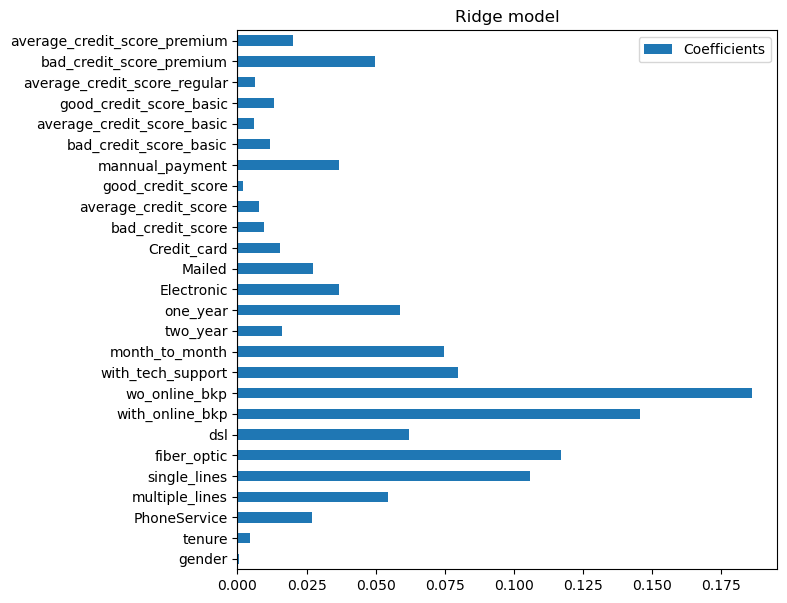

In [87]:
coefs = pd.DataFrame(
   np.abs(linear_model_fe.coef_),
   columns=['Coefficients'], index=x_var_fe
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Model Testing with new features

## Logistic Regression

### Model Creation

In [88]:
x_var_fe = ['gender', 
            'tenure', 
            'PhoneService',
            'multiple_lines', 
            'single_lines', 
            'fiber_optic', 
            'dsl',
            'with_online_bkp', 
            'wo_online_bkp', 
            'with_tech_support', 
            'month_to_month', 
            'two_year', 
            'one_year',
            'Electronic', 
            'Mailed', 
            'Credit_card', 
            'bad_credit_score',
            'average_credit_score', 
            'good_credit_score',
            'mannual_payment', 
            'bad_credit_score_basic', 
            'average_credit_score_basic',
            'good_credit_score_basic',
            'average_credit_score_regular', 
            'bad_credit_score_premium', 
            'average_credit_score_premium',
            ]


y_data_fe = df_customer.loc[ : , 'Churn']
x_data_fe = df_customer.loc[ : , x_var_fe]


#Splitting training and test-data
x_train_lr_fe, x_test_lr_fe, y_train_lr_fe, y_test_lr_fe = train_test_split(
            x_data_fe, # x-variables (can change this)
            y_data_fe, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 210)


# Oversample
######################################
os = SMOTE(random_state=0)

os_data_x_fe,os_data_y_fe = os.fit_resample(x_train_lr_fe, y_train_lr_fe)
os_data_x_fe = pd.DataFrame(data = os_data_x_fe,
                         columns = x_var_fe )
os_data_y_fe= pd.Series(data=os_data_y_fe)

n_no_churn = len(os_data_y_fe[os_data_y_fe==0])
n_churn = len(os_data_y_fe[os_data_y_fe==0])
p_churn = len(os_data_y_fe[
    os_data_y_fe==0])/len(os_data_x_fe)
p_no_churn = len(os_data_y_fe[
    os_data_y_fe==1])/len(os_data_x_fe)


print(f"""

Lenght of oversampled data is {len(os_data_x)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                 {n_churn}        {p_churn}
No Churn              {n_no_churn}        {p_no_churn}
""")

#creating the model

logreg_model_fe = LogisticRegression(solver       = 'lbfgs',
                        C            = 1,
                        random_state = 210,
                        max_iter     = 10000)

#checking the fit of model

logreg_model_fe.fit(os_data_x_fe, os_data_y_fe)



Lenght of oversampled data is 8714

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                 4357        0.5
No Churn              4357        0.5



LogisticRegression(C=1, max_iter=10000, random_state=210)

### Prediction

In [89]:
# Predict
y_predicted_fe = logreg_model_fe.predict(x_test_lr_fe)

### Model Evaluation

In [90]:
# Instantiate scores
LR_train_score = logreg_model_fe.score(os_data_x_fe, os_data_y_fe).round(4)
LR_test_score  = logreg_model_fe.score(x_test_lr_fe, y_test_lr_fe).round(4)
LR_test_gap    = abs(LR_test_score - LR_train_score).round(4)
LR_auc_score   = roc_auc_score(y_true  = y_test_lr_fe, y_score = y_predicted_fe).round(4)
LR_report      = classification_report(y_test_lr_fe, 
                                       y_predicted_fe,
                                       target_names = ['No Churn (0)',
                                                       'Churn (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Logistic Regression

Model Size: {x_data_fe.shape[1] + 1}

---------------------------------

LR Training Score : {LR_train_score}
LR Testing Score  : {LR_test_score}
LR Train-Test Gap : {LR_test_gap}

LR AUC Score      : {LR_auc_score}

---------------------------------

""")

#Model Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_model_fe.score(x_test_lr_fe, y_test_lr_fe)))

#confusion matrix
conf_m_logreg_smote = confusion_matrix(y_test_lr_fe, y_predicted_fe)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)

# Unpack confusion matrix
LR_tn, \
LR_fp, \
LR_fn, \
LR_tp = confusion_matrix(y_true = y_test_lr_fe, y_pred = y_predicted_fe).ravel()


#classification matrix
classif_report_logreg_smote = classification_report(y_test_lr_fe, y_predicted_fe)
print("\nClassification Report \n")
print(classif_report_logreg_smote)


=================== MODEL SUMMARY ===================

Model Type: Logistic Regression

Model Size: 27

---------------------------------

LR Training Score : 0.8098
LR Testing Score  : 0.7666
LR Train-Test Gap : 0.0432

LR AUC Score      : 0.7483

---------------------------------


Accuracy of logistic regression classifier on test set: 0.77

Confusion Matrix: 

[[1164  318]
 [ 145  357]]

Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1482
           1       0.53      0.71      0.61       502

    accuracy                           0.77      1984
   macro avg       0.71      0.75      0.72      1984
weighted avg       0.80      0.77      0.78      1984



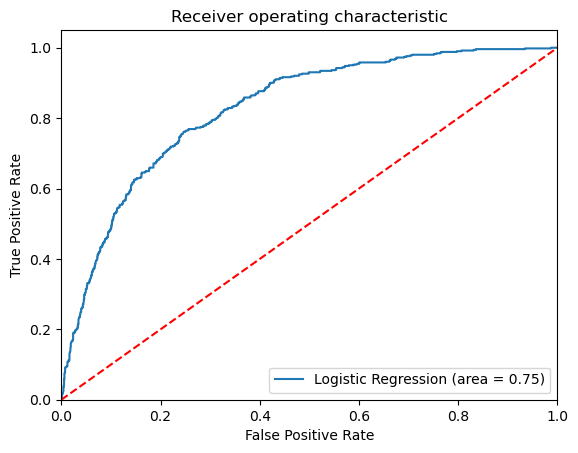

In [91]:
logit_roc_auc_fe = roc_auc_score(y_test_lr_fe, logreg_model_fe.predict(x_test_lr_fe))
fpr, tpr, thresholds = roc_curve(y_test_lr_fe, logreg_model_fe.predict_proba(x_test_lr_fe)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_fe)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

                     Feature  Importance
1                     tenure    0.034916
13                Electronic    0.036654
19           mannual_payment    0.036654
24  bad_credit_score_premium    0.100220
7            with_online_bkp    0.120494
6                        dsl    0.190574
8              wo_online_bkp    0.225174
0                     gender    0.259591
22   good_credit_score_basic    0.493252
9          with_tech_support    0.662464


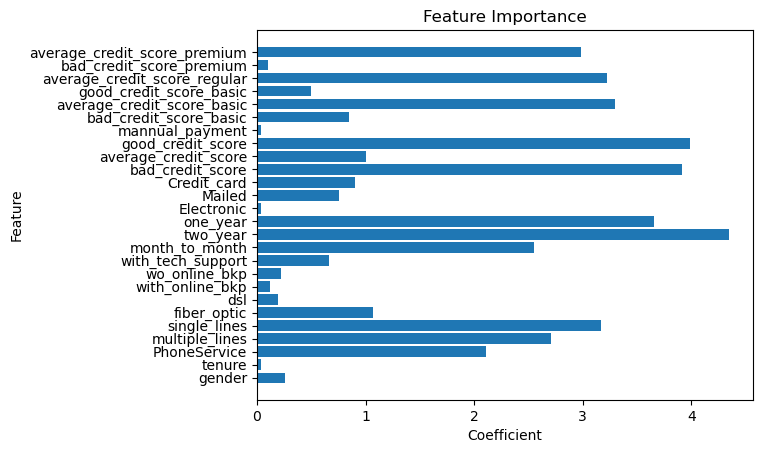

In [92]:
# Get the coefficients of the logistic regression model
coefs = logreg_model_fe.coef_[0]

# Get the absolute value of the coefficients
abs_coefs = abs(coefs)

# Create a pandas DataFrame with feature names and their importance
features = pd.DataFrame({'Feature': x_var_fe, 'Importance': abs_coefs})

# Sort the DataFrame by importance in descending order
features = features.sort_values('Importance', ascending=True)

# Print the top 10 features by importance
print(features.head(10))

# Create a horizontal bar plot
plt.barh(x_var_fe, abs_coefs)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


## Decision Tree

### Model Creation 

In [93]:
x_var_dt = ['tenure', 
            'PhoneService',
            'CreditScore', 
            'fiber_optic', 
            'dsl',  
            'month_to_month', 
            'one_year']

x_data_dt = df_customer.loc[:, x_var_dt]
y_data_dt = df_customer.loc[:, 'Churn']

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(x_data_dt)

# Transform explanatory variables
x_scaled_dt = scaler.transform(x_data_dt)

# Train-test split with stratification
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(
            x_scaled_dt,
            y_data_dt,
            test_size    = 0.25,
            random_state = 210,
            )  

# Oversample

os_dt = SMOTE(random_state=0)

os_data_x_dt,os_data_y_dt = os.fit_resample(x_train_dt, y_train_dt)
os_data_x_dt = pd.DataFrame(data = os_data_x_dt,
                         columns = x_var_dt )
os_data_y_dt= pd.Series(data=os_data_y_dt)

n_churn = len(os_data_y_dt[os_data_y_dt==1])
n_no_churn = len(os_data_y_dt[os_data_y_dt==0])
p_churn = len(os_data_y_dt[
    os_data_y_dt==0])/len(os_data_x_dt)
p_no_churn = len(os_data_y_dt[
    os_data_y_dt==1])/len(os_data_x_dt)


print(f"""

Lenght of oversampled data is {len(os_data_x_dt)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Cross-sell            {n_churn}        {p_churn}
No Cross-sell         {n_no_churn}        {p_no_churn}
""")


# Instantiate a classification tree object
baseTree = DecisionTreeClassifier(criterion = 'gini',
                                  splitter  = 'best',
                                  max_depth = 4,
                                  min_samples_leaf = 25,
                                  random_state = 210)

# Fit the training data
baseTree = baseTree.fit(os_data_x_dt.values, os_data_y_dt)



Lenght of oversampled data is 8714

Response Variable     Number    Proportion
-----------------     -------   -------------
Cross-sell            4357        0.5
No Cross-sell         4357        0.5



### Prediction

In [94]:
# Predict cross-selling
y_predicted_dt = baseTree.predict(x_test_dt)


# Reassign column names
os_data_x_dt = pd.DataFrame(os_data_x_dt, columns = x_var_dt)


### Model Evaluation

In [95]:
#####################
# Save scores
baseTree_train_score = baseTree.score(os_data_x_dt.values, os_data_y_dt).round(4) # accuracy
baseTree_test_score  = baseTree.score(x_test_dt, y_test_dt).round(4)   # accuracy
baseTree_test_gap    = abs(baseTree_test_score - baseTree_train_score).round(4)
baseTree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = y_predicted_dt).round(4) # auc
baseTree_report      = classification_report(y_test_dt, 
                                             y_predicted_dt,
                                             target_names = [
                                                 'No Churn (0)',
                                                 'Churn (1)'])


#####################
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Decision Tree

Model Size: {x_data_dt.shape[1] + 1}

---------------------------------

Decision Tree Training Score : {baseTree_train_score}
Decision Tree Testing Score  : {baseTree_test_score}
Decision Tree Test-Gap       : {baseTree_test_gap}
Decision Tree AUC Score      : {baseTree_auc_score}

---------------------------------

""")


#Model Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(baseTree.score(x_test_dt, y_test_dt)))

#confusion matrix
conf_m_logreg_smote = confusion_matrix(y_test_dt, y_predicted_dt)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)

# Unpack confusion matrix
baseTree_tn, \
baseTree_fp, \
baseTree_fn, \
baseTree_tp = confusion_matrix(y_true = y_test_dt, y_pred = y_predicted_dt).ravel()


#classification matrix
classif_report_logreg_smote = classification_report(y_test_dt, y_predicted_dt)
print("\nClassification Report \n")
print(classif_report_logreg_smote)



=================== MODEL SUMMARY ===================

Model Type: Decision Tree

Model Size: 8

---------------------------------

Decision Tree Training Score : 0.7747
Decision Tree Testing Score  : 0.7525
Decision Tree Test-Gap       : 0.0222
Decision Tree AUC Score      : 0.7507

---------------------------------


Accuracy of logistic regression classifier on test set: 0.75

Confusion Matrix: 

[[1118  364]
 [ 127  375]]

Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1482
           1       0.51      0.75      0.60       502

    accuracy                           0.75      1984
   macro avg       0.70      0.75      0.71      1984
weighted avg       0.80      0.75      0.77      1984



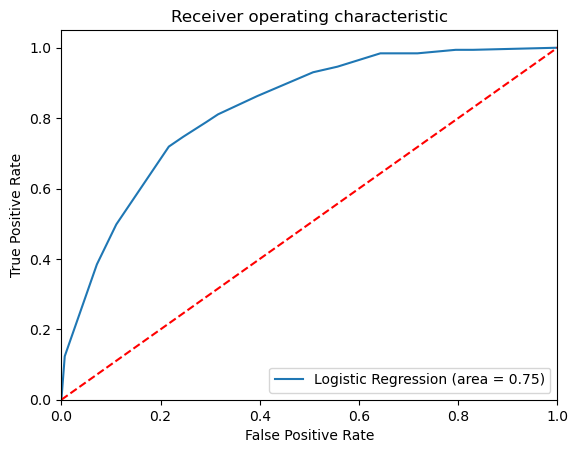

In [96]:
logit_roc_auc_dt = roc_auc_score(y_test_dt, baseTree.predict(x_test_dt))
fpr, tpr, thresholds = roc_curve(y_test_dt, baseTree.predict_proba(x_test_dt)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_dt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

                Importance
CreditScore       0.001707
one_year          0.013631
PhoneService      0.016178
dsl               0.025527
fiber_optic       0.134962
tenure            0.150913
month_to_month    0.657082


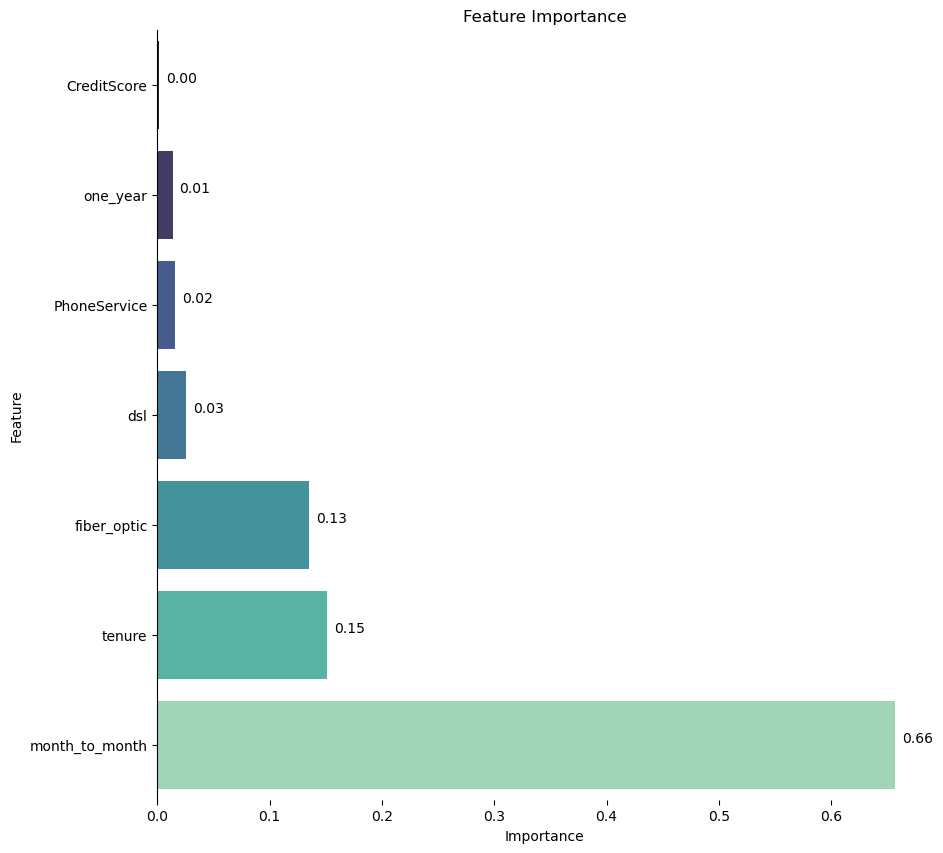

In [97]:
# Create a dataframe of feature importance
features_dt = pd.DataFrame(baseTree.feature_importances_, x_var_dt, columns=['Importance'])

# Sort the DataFrame by importance in descending order
features_dt = features_dt.sort_values('Importance', ascending=True)

# Print the top 10 features by importance
print(features_dt.head(10))

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = features_dt,
                 x       = 'Importance',
                 y       = features_dt.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -30), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(features_dt)))
ax.set_yticklabels(features_dt.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

## Random Forest

### Model Creation

In [98]:
x_var_rf = ['gender', 
            'tenure', 
            'PhoneService',
            'CreditScore',
            'EstimatedSalary', 
            'TotalCharges',
            'multiple_lines', 
            'single_lines', 
            'fiber_optic', 
            'dsl',
            'with_online_bkp', 
            'wo_online_bkp', 
            'with_tech_support', 
            'month_to_month', 
            'two_year', 
            'one_year',
            'Electronic', 
            'Mailed', 
            'Credit_card', 
            'bad_credit_score',
            'average_credit_score', 
            'good_credit_score',
            'mannual_payment', 
            'bad_credit_score_basic', 
            'average_credit_score_basic',
            'good_credit_score_basic',
            'average_credit_score_regular', 
            'bad_credit_score_premium', 
            'average_credit_score_premium',
            ]

x_data_rf = df_customer.loc[:, x_var_rf]
y_data_rf = df_customer.loc[:, 'Churn']

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(x_data_rf)

# Transform explanatory variables
x_scaled_rf = scaler.transform(x_data_rf)

# Train-test split with stratification
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(
            x_scaled_rf,
            y_data_rf,
            test_size    = 0.25,
            random_state = 210,
            )  

# Oversample

os_rf = SMOTE(random_state=0)

os_data_x_rf,os_data_y_rf = os.fit_resample(x_train_rf, y_train_rf)
os_data_x_rf = pd.DataFrame(data = os_data_x_rf,
                         columns = x_var_rf )
os_data_y_rf= pd.Series(data=os_data_y_rf)

n_churn = len(os_data_y_rf[os_data_y_rf==1])
n_no_churn = len(os_data_y_rf[os_data_y_rf==0])
p_churn = len(os_data_y_rf[
    os_data_y_rf==0])/len(os_data_x_rf)
p_no_churn = len(os_data_y_rf[
    os_data_y_rf==1])/len(os_data_x_rf)


print(f"""

Lenght of oversampled data is {len(os_data_x_rf)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Cross-sell            {n_churn}        {p_churn}
No Cross-sell         {n_no_churn}        {p_no_churn}
""")

# Reassign column names
os_data_x_rf = pd.DataFrame(os_data_x_rf.values, columns = x_var_rf)



# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 1000,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 210)
# FITTING the training data
rf_default = rf_default.fit(os_data_x_rf.values, os_data_y_rf)





Lenght of oversampled data is 8714

Response Variable     Number    Proportion
-----------------     -------   -------------
Cross-sell            4357        0.5
No Cross-sell         4357        0.5



### Prediction

In [99]:
# PREDICTING based on the testing set
y_predicted_rf = rf_default.predict(x_test_rf)

### Model Evaluation

In [100]:
# Instantiate scores
rf_train_score = rf_default.score(os_data_x_rf.values, os_data_y_rf).round(4)
rf_test_score  = rf_default.score(x_test_rf, y_test_rf).round(4)
rf_test_gap    = abs(rf_test_score - rf_train_score).round(4)
rf_auc_score   = roc_auc_score(y_true  = y_test_rf, y_score = y_predicted_rf).round(4)
rf_report      = classification_report(y_test_rf, 
                                       y_predicted_rf,
                                       target_names = ['No Churn (0)',
                                                       'CHurn (1)'])
# Print results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Random Forest

Model Size: {x_data_rf.shape[1] + 1}

---------------------------------

RF Training Score : {rf_train_score}
RF Testing Score  : {rf_test_score}
RF Train-Test Gap : {rf_test_gap}

RF AUC Score      : {rf_auc_score}

---------------------------------

""")

#Model Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf_default.score(x_test_rf, y_test_rf)))

#confusion matrix
conf_m_logreg_smote = confusion_matrix(y_test_rf, y_predicted_rf)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)

# Unpack confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test_rf, y_pred = y_predicted_rf).ravel()


#classification matrix
classif_report_logreg_smote = classification_report(y_test_rf, y_predicted_rf)
print("\nClassification Report \n")
print(classif_report_logreg_smote)



=================== MODEL SUMMARY ===================

Model Type: Random Forest

Model Size: 30

---------------------------------

RF Training Score : 0.8515
RF Testing Score  : 0.7591
RF Train-Test Gap : 0.0924

RF AUC Score      : 0.7597

---------------------------------


Accuracy of logistic regression classifier on test set: 0.76

Confusion Matrix: 

[[1124  358]
 [ 120  382]]

Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1482
           1       0.52      0.76      0.62       502

    accuracy                           0.76      1984
   macro avg       0.71      0.76      0.72      1984
weighted avg       0.81      0.76      0.77      1984



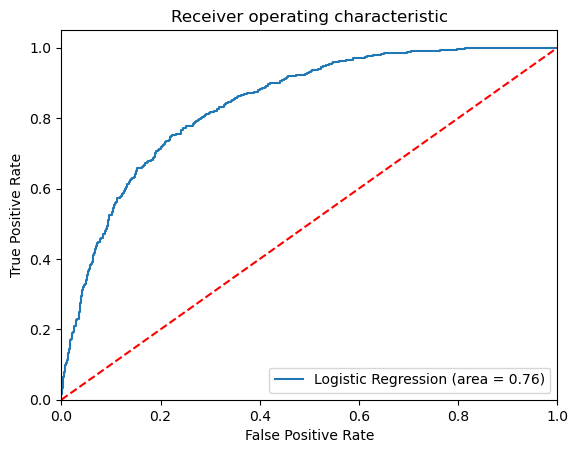

In [101]:
logit_roc_auc_rf = roc_auc_score(y_test_rf, rf_default.predict(x_test_rf))
fpr, tpr, thresholds = roc_curve(y_test_rf, rf_default.predict_proba(x_test_rf)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

                              Importance
bad_credit_score                0.001977
average_credit_score_basic      0.002107
bad_credit_score_premium        0.002528
good_credit_score               0.002703
bad_credit_score_basic          0.002744
average_credit_score_premium    0.002885
average_credit_score            0.002887
good_credit_score_basic         0.003085
average_credit_score_regular    0.003171
PhoneService                    0.006709


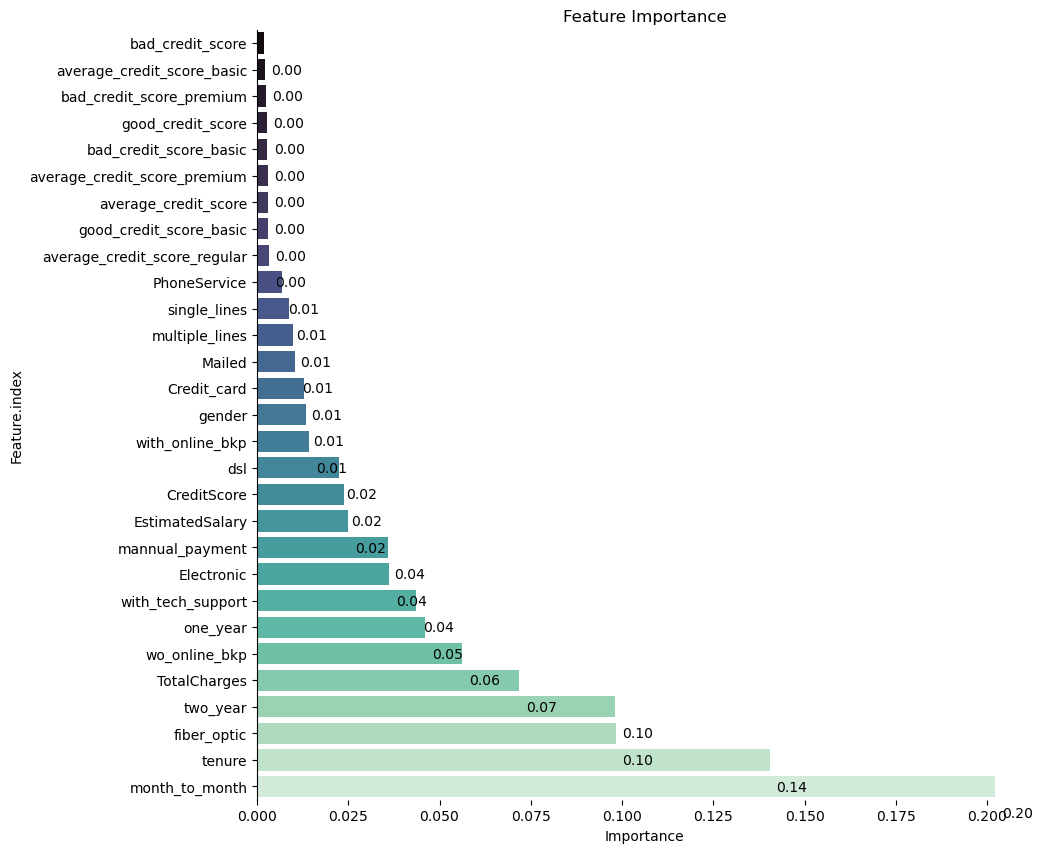

In [102]:
# Create a dataframe of feature importance
features_rf = pd.DataFrame(rf_default.feature_importances_, os_data_x_rf.columns, columns=['Importance'])

# Sort the DataFrame by importance in descending order
features_rf = features_rf.sort_values('Importance', ascending=True)

# Print the top 10 features by importance
print(features_rf.head(10))

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = features_rf,
                 x       = 'Importance',
                 y       = features_rf.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -30), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(features_rf)))
ax.set_yticklabels(features_rf.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature.index')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

## Turned Random Forest

### Creating Model

In [103]:
x_var_trf = ['gender', 
            'tenure', 
            'PhoneService',
            'CreditScore',
            'EstimatedSalary', 
            'TotalCharges',
            'multiple_lines', 
            'single_lines', 
            'fiber_optic', 
            'dsl',
            'with_online_bkp', 
            'wo_online_bkp', 
            'with_tech_support', 
            'month_to_month', 
            'two_year', 
            'one_year',
            'Electronic', 
            'Mailed', 
            'Credit_card', 
            'bad_credit_score',
            'average_credit_score', 
            'good_credit_score',
            'mannual_payment', 
            'bad_credit_score_basic', 
            'average_credit_score_basic',
            'good_credit_score_basic',
            'bad_credit_score_regular',
            'average_credit_score_regular', 
            'bad_credit_score_premium', 
            'average_credit_score_premium',
           ]

x_data_trf = df_customer.loc[:, x_var_trf]
y_data_trf = df_customer.loc[:, 'Churn']

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(x_data_trf)

# Transform explanatory variables
x_scaled_trf = scaler.transform(x_data_trf)

# Train-test split with stratification
x_train_trf, x_test_trf, y_train_trf, y_test_trf = train_test_split(
            x_data_trf,
            y_data_trf,
            test_size    = 0.25,
            random_state = 210,
            stratify = y_data_trf
            ) 

# Oversample

os_trf = SMOTE(random_state=0)

os_data_x_trf,os_data_y_trf = os.fit_resample(x_train_trf, y_train_trf)
os_data_x_trf = pd.DataFrame(data = os_data_x_trf,
                         columns = x_var_trf )
os_data_y_trf= pd.Series(data=os_data_y_trf)

n_churn = len(os_data_y_trf[os_data_y_trf==1])
n_no_churn = len(os_data_y_trf[os_data_y_trf==0])
p_churn = len(os_data_y_trf[
    os_data_y_trf==0])/len(os_data_x_trf)
p_no_churn = len(os_data_y_rf[
    os_data_y_trf==1])/len(os_data_x_trf)


print(f"""

Lenght of oversampled data is {len(os_data_x_trf)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                 {n_churn}        {p_churn}
No Churn              {n_no_churn}     {p_no_churn}
""")

# Tune Hyperparameters

# declaring a hyperparameter space
estimator_space  = np.arange(300, 350, 10)
criterion_space  = ['gini']
depth_space      = np.arange(5, 9, 1)
#leaf_space       = np.arange(1, 10, 1)
bootstrap_space  = [True, False]
warm_start_space = [True, False]
#split_space      = np.arange(1, 525, 25)
#features_space   = np.arange(1, 14, 1)

# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'criterion'        : criterion_space,
              'max_depth'        : depth_space,
#              'min_samples_leaf' : leaf_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}

# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 210)

# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv           = 3,
                               n_iter       = 10,
                               random_state = 210,
                               scoring      = make_scorer(roc_auc_score,
                                              needs_threshold = False))

# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(x_data_trf.values, y_data_trf)


# Create tuned model

# Instantiate model
rf_tuned = forest_cv.best_estimator_


# Fit the  model
rf_tuned = rf_tuned.fit(os_data_x_trf.values, os_data_y_trf)




Lenght of oversampled data is 8758

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                 4379        0.5
No Churn              4379     0.4949760219228134



### Prediction

In [104]:
# Predict on test set
y_predicted_trf = rf_tuned.predict(x_test_trf)


# Reassign column names
os_data_x = pd.DataFrame(os_data_x_trf, columns = x_var_trf)


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Model Evaluation

In [105]:
# Instantiate scores
rf_tuned_train_score = rf_tuned.score(os_data_x_trf.values, os_data_y_trf).round(4)
rf_tuned_test_score  = rf_tuned.score(x_test_trf, y_test_trf).round(4)
rf_tuned_test_gap    = abs(rf_tuned_test_score - rf_tuned_train_score).round(4)
rf_tuned_auc_score   = roc_auc_score(y_true  = y_test_trf, y_score = y_predicted_trf).round(4)
rf_tuned_report      = classification_report(y_test, 
                                       y_predicted_trf,
                                       target_names = ['No Churn (0)',
                                                       'Churn (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: Random Forest Tuned

Model Size: {x_data_trf.shape[1] + 1}

---------------------------------

Tuned Forest Training Score : {rf_tuned_train_score}
Tuned Forest Testing Score  : {rf_tuned_test_score}
Tuned Forest Train-Test Gap : {rf_tuned_test_gap}

Tuned Forest AUC Score      : {rf_tuned_auc_score}

---------------------------------

""")

#Model Accuracy
#confusion matrix
conf_m_logreg_smote = confusion_matrix(y_test_trf, y_predicted_trf)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)

# Unpack confusion matrix
rf_tuned_tn, \
rf_tuned_fp, \
rf_tuned_fn, \
rf_tuned_tp = confusion_matrix(y_true = y_test_trf, y_pred = y_predicted_trf).ravel()


#classification matrix
classif_report_logreg_smote = classification_report(y_test_trf, y_predicted_trf)
print("\nClassification Report \n")
print(classif_report_logreg_smote)




=================== MODEL SUMMARY ===================

Model Type: Random Forest Tuned

Model Size: 31

---------------------------------

Tuned Forest Training Score : 0.8616
Tuned Forest Testing Score  : 0.7722
Tuned Forest Train-Test Gap : 0.0894

Tuned Forest AUC Score      : 0.7614

---------------------------------



Confusion Matrix: 

[[1145  315]
 [ 137  387]]

Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.78      0.84      1460
           1       0.55      0.74      0.63       524

    accuracy                           0.77      1984
   macro avg       0.72      0.76      0.73      1984
weighted avg       0.80      0.77      0.78      1984



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


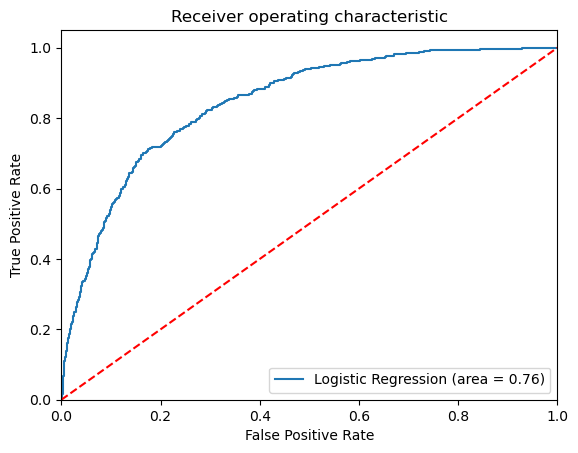

In [106]:
logit_roc_auc_trf = roc_auc_score(y_test_trf, rf_tuned.predict(x_test_trf))
fpr, tpr, thresholds = roc_curve(y_test_trf, rf_tuned.predict_proba(x_test_trf)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_trf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


                              Importance
average_credit_score_basic      0.001163
average_credit_score_premium    0.001500
bad_credit_score_premium        0.001580
bad_credit_score_regular        0.001830
average_credit_score_regular    0.001946
bad_credit_score_basic          0.002138
good_credit_score_basic         0.002916
Electronic                      0.004661
mannual_payment                 0.005831
PhoneService                    0.006504


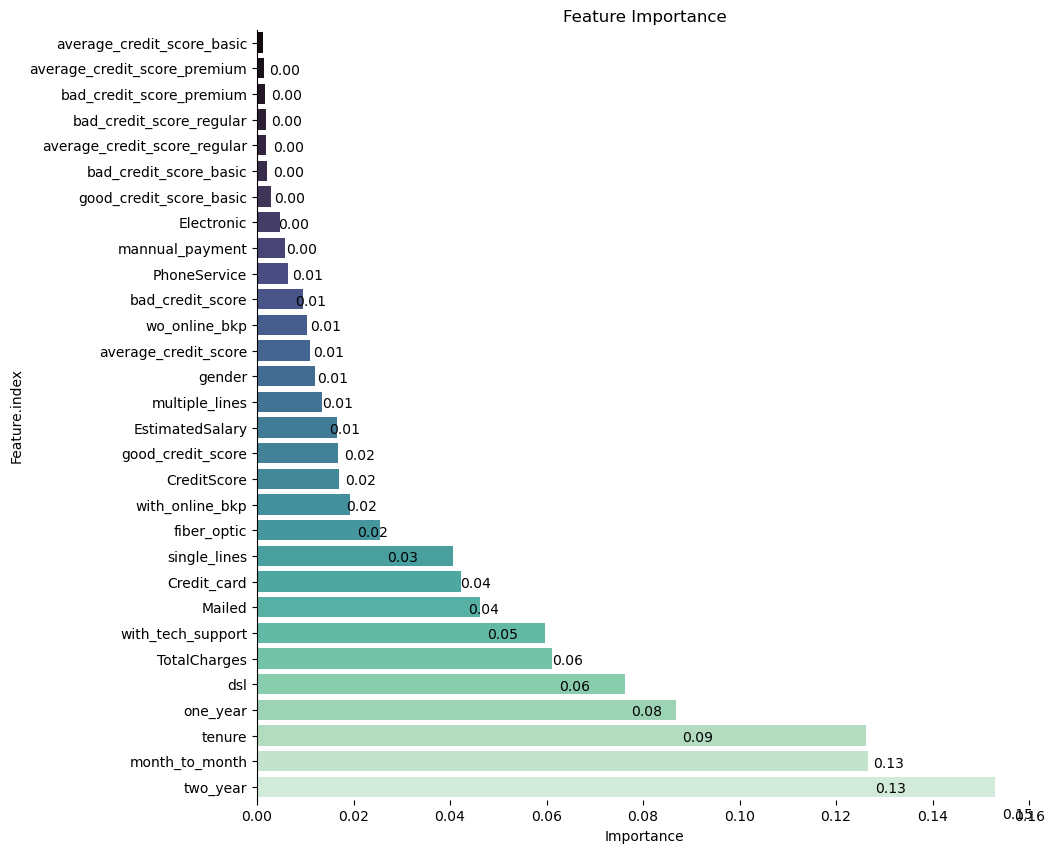

In [107]:
# Create a dataframe of feature importance
features_trf = pd.DataFrame(rf_tuned.feature_importances_, os_data_x_trf.columns, columns=['Importance'])

# Sort the DataFrame by importance in descending order
features_trf = features_trf.sort_values('Importance', ascending=True)

# Print the top 10 features by importance
print(features_trf.head(10))

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = features_trf,
                 x       = 'Importance',
                 y       = features_trf.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -30), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(features_trf)))
ax.set_yticklabels(features_trf.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature.index')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

In [108]:
# Check best parameters
forest_cv.best_params_

{'warm_start': False,
 'n_estimators': 320,
 'max_depth': 8,
 'criterion': 'gini',
 'bootstrap': False}

## Gradient Boost

### Creating Model

In [109]:
x_var_gbm = ['gender', 
            'tenure', 
            'CreditScore',
            'EstimatedSalary', 
            'TotalCharges',
            'multiple_lines', 
            'single_lines', 
            'fiber_optic', 
            'dsl',
            'with_online_bkp', 
            'wo_online_bkp', 
            'with_tech_support', 
            'month_to_month', 
            'two_year', 
            'one_year',
            'Electronic', 
            'Mailed', 
            'Credit_card', 
            'bad_credit_score',
            'average_credit_score', 
            'good_credit_score', 
            'bad_credit_score_basic',  
            ]

x_data_gbm = df_customer.loc[:, x_var_gbm]
y_data_gbm = df_customer.loc[:, 'Churn']

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(x_data_gbm)

# Transform explanatory variables
x_scaled_gbm = scaler.transform(x_data_gbm)

# Train-test split with stratification
x_train_gbm, x_test_gbm, y_train_gbm, y_test_gbm = train_test_split(
            x_data_gbm,
            y_data_gbm,
            test_size    = 0.25,
            random_state = 210,
            stratify = y_data_gbm
            ) 

# Oversample

os_gbm = SMOTE(random_state=0)

os_data_x_gbm,os_data_y_gbm = os_gbm.fit_resample(x_train_gbm, y_train_gbm)
os_data_x_gbm = pd.DataFrame(data = os_data_x_gbm,
                         columns = x_var_gbm )
os_data_y_gbm= pd.Series(data=os_data_y_gbm)

n_churn = len(os_data_y_gbm[os_data_y_gbm==1])
n_no_churn = len(os_data_y_gbm[os_data_y_gbm==0])
p_churn = len(os_data_y_gbm[
    os_data_y_gbm==0])/len(os_data_x_gbm)
p_no_churn = len(os_data_y_gbm[
    os_data_y_gbm==1])/len(os_data_x_gbm)


print(f"""

Lenght of oversampled data is {len(os_data_x_trf)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                 {n_churn}        {p_churn}
No Churn              {n_no_churn}     {p_no_churn}
""")


# Create model

# INSTANTIATING the model object without hyperparameters
gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                         learning_rate = 0.1,
                                         n_estimators  = 100,
                                         criterion     = 'friedman_mse',
                                         max_depth     = 3,
                                         warm_start    = False,
                                         random_state  = 210)

# FIT step is needed as we are not using .best_estimator
gbm_default = gbm_default.fit(os_data_x_gbm.values, os_data_y_gbm)






Lenght of oversampled data is 8758

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                 4379        0.5
No Churn              4379     0.5



### Predicting

In [110]:
# PREDICTING based on the testing set
y_predicted_gbm = gbm_default.predict(x_test_gbm)

C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


### Model Efficiency

In [111]:
# Instantiate scores
gbm_default_train_score = gbm_default.score(os_data_x_gbm.values, os_data_y_gbm).round(4)
gbm_default_test_score  = gbm_default.score(x_test_gbm, y_test_gbm).round(4)
gbm_default_test_gap    = abs(gbm_default_test_score - gbm_default_train_score).round(4)
gbm_default_auc_score   = roc_auc_score(y_true  = y_test_gbm, y_score = y_predicted_gbm).round(4)
gbm_default_report      = classification_report(y_test_gbm, 
                                       y_predicted_gbm,
                                       target_names = ['No Churn (0)',
                                                       'Churn (1)'])

# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM

Model Size: {x_data_gbm.shape[1] + 1}

---------------------------------

GBM Training Score : {gbm_default_train_score}
GBM Testing Score  : {gbm_default_test_score}
GBM Train-Test Gap : {gbm_default_test_gap}

GBM AUC Score      : {gbm_default_auc_score}

---------------------------------

""")


#Model Accuracy
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf_default.score(x_test_gbm, y_test_gbm)))

#confusion matrix
conf_m_logreg_smote = confusion_matrix(y_test_gbm, y_predicted_gbm)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)

# Unpack confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test_gbm, y_pred = y_predicted_gbm).ravel()


#classification matrix
classif_report_logreg_smote = classification_report(y_test_gbm, y_predicted_gbm)
print("\nClassification Report \n")
print(classif_report_logreg_smote)


=================== MODEL SUMMARY ===================

Model Type: GBM

Model Size: 23

---------------------------------

GBM Training Score : 0.8616
GBM Testing Score  : 0.7959
GBM Train-Test Gap : 0.0657

GBM AUC Score      : 0.7494

---------------------------------



Confusion Matrix: 

[[1238  222]
 [ 183  341]]

Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1460
           1       0.61      0.65      0.63       524

    accuracy                           0.80      1984
   macro avg       0.74      0.75      0.74      1984
weighted avg       0.80      0.80      0.80      1984



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


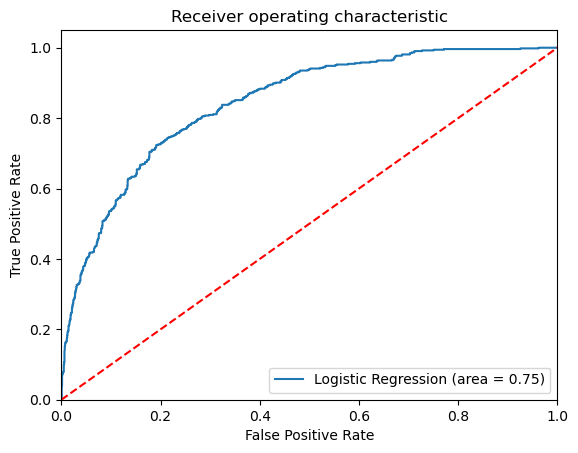

In [112]:
logit_roc_auc_gbm = roc_auc_score(y_test_gbm, gbm_default.predict(x_test_gbm))
fpr, tpr, thresholds = roc_curve(y_test_gbm, gbm_default.predict_proba(x_test_gbm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_gbm)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

                        Importance
Electronic                0.001342
bad_credit_score_basic    0.001414
fiber_optic               0.002551
CreditScore               0.003984
with_online_bkp           0.004650
wo_online_bkp             0.005989
gender                    0.006146
EstimatedSalary           0.014147
average_credit_score      0.021529
multiple_lines            0.021837


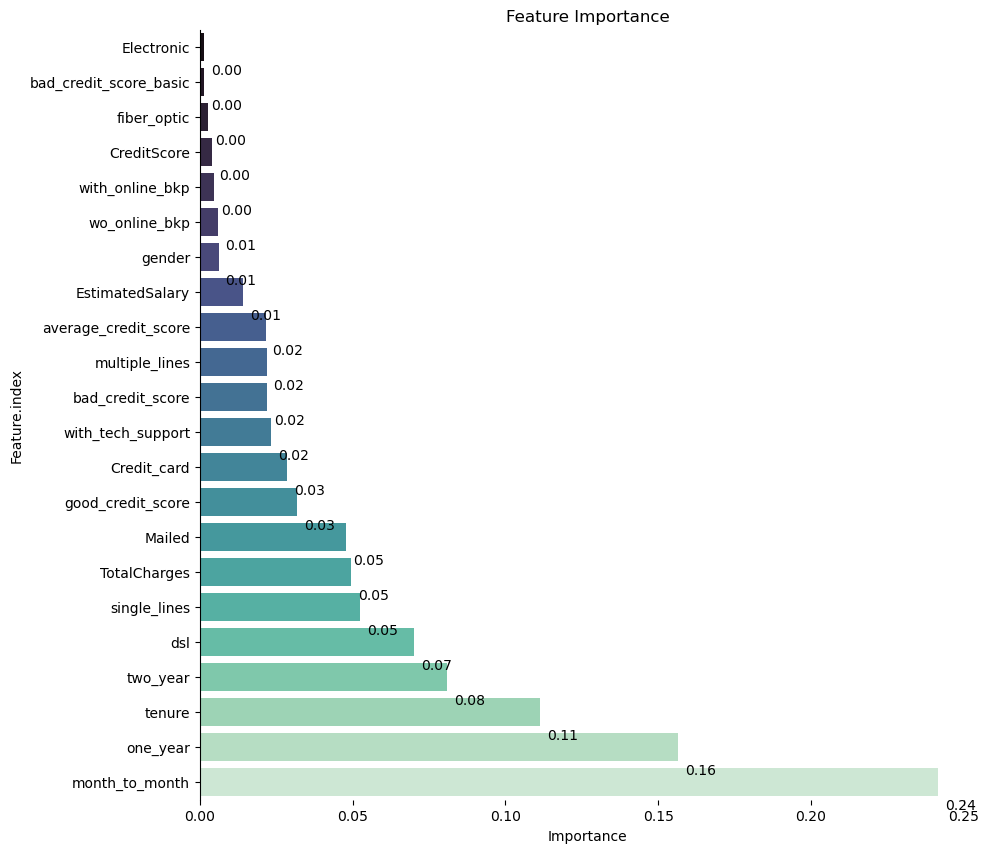

In [113]:
# Create a dataframe of feature importance
features_gbm = pd.DataFrame(gbm_default.feature_importances_, os_data_x_gbm.columns, columns=['Importance'])

# Sort the DataFrame by importance in descending order
features_gbm = features_gbm.sort_values('Importance', ascending=True)

# Print the top 10 features by importance
print(features_gbm.head(10))

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = features_gbm,
                 x       = 'Importance',
                 y       = features_gbm.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -30), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(features_gbm)))
ax.set_yticklabels(features_gbm.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature.index')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

## Turned Gradient Boosted Machines (GBM)

### Creating a Model

In [114]:
x_var_gbm = ['gender', 
            'tenure', 
            'PhoneService',
            'EstimatedSalary', 
            'TotalCharges',
            'multiple_lines', 
            'single_lines', 
            'fiber_optic', 
            'dsl',
            'wo_online_bkp', 
            'with_tech_support', 
            'month_to_month', 
            'two_year',
            'Electronic', 
            'Mailed', 
            'mannual_payment', 
            'bad_credit_score_basic', 
            'average_credit_score_regular', 
            'good_credit_score_regular',
            'bad_credit_score_premium', 
            'average_credit_score_premium',
            'good_credit_score_premium'
           ]

x_data_gbm = df_customer.loc[:, x_var_gbm]
y_data_gbm = df_customer.loc[:, 'Churn']

# Instantiate scaler
scaler = RobustScaler()

# Fit scaler
scaler.fit(x_data_gbm)

# Transform explanatory variables
x_scaled_gbm = scaler.transform(x_data_gbm)

# Train-test split with stratification
x_train_gbm, x_test_gbm, y_train_gbm, y_test_gbm = train_test_split(
            x_data_gbm,
            y_data_gbm,
            test_size    = 0.25,
            random_state = 210,
            stratify = y_data_gbm
            ) 

# Oversample

os_gbm = SMOTE(random_state=0)

os_data_x_gbm,os_data_y_gbm = os_gbm.fit_resample(x_train_gbm, y_train_gbm)
os_data_x_gbm = pd.DataFrame(data = os_data_x_gbm,
                         columns = x_var_gbm )
os_data_y_gbm= pd.Series(data=os_data_y_gbm)

n_churn = len(os_data_y_gbm[os_data_y_gbm==1])
n_no_churn = len(os_data_y_gbm[os_data_y_gbm==0])
p_churn = len(os_data_y_gbm[
    os_data_y_gbm==0])/len(os_data_x_gbm)
p_no_churn = len(os_data_y_gbm[
    os_data_y_gbm==1])/len(os_data_x_gbm)


print(f"""

Lenght of oversampled data is {len(os_data_x_trf)}

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                 {n_churn}        {p_churn}
No Churn              {n_no_churn}     {p_no_churn}
""")



Lenght of oversampled data is 8758

Response Variable     Number    Proportion
-----------------     -------   -------------
Churn                 4379        0.5
No Churn              4379     0.5



In [115]:
# GBM Tuned

# declaring a hyperparameter space
learn_space        = np.arange(0.1, 3.0, 0.1)
estimator_space    = np.arange(120, 150, 10)
depth_space        = np.arange(3, 5, 1)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate'     : learn_space,
              'n_estimators'      : estimator_space,
              'max_depth'         : depth_space,
              'warm_start'        : warm_start_space}

# INSTANTIATING the model object without hyperparameters
gbm_grid = GradientBoostingClassifier(random_state = 210)


# GridSearchCV object
gbm_cv = RandomizedSearchCV(estimator          = gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 210,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
gbm_cv.fit(x_data_gbm.values, y_data_gbm)

# Create tuned model

# Instantiate a logistic regression model
gbm_tuned = gbm_cv.best_estimator_

# FIT step is needed as we are not using .best_estimator
gbm_tuned = gbm_tuned.fit(os_data_x_gbm.values, os_data_y_gbm)

### Predicting

In [116]:
# PREDICTING based on the testing set
y_predicted_tgbm = gbm_tuned.predict(x_test_gbm)

C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


### Model Evaluation

In [117]:
# Instantiate scores
gbm_tuned_train_score = gbm_tuned.score(os_data_x_gbm.values, os_data_y_gbm).round(4)
gbm_tuned_test_score  = gbm_tuned.score(x_test_gbm, y_test_gbm).round(4)
gbm_tuned_test_gap    = abs(gbm_tuned_test_score - gbm_tuned_train_score).round(4)
gbm_tuned_auc_score   = roc_auc_score(y_true  = y_test_gbm, y_score = y_predicted_tgbm).round(4)
gbm_tuned_report      = classification_report(y_test_gbm, 
                                       y_predicted_tgbm,
                                       target_names = ['No Churn (0)',
                                                       'Churn (1)'])
# Score results
print(f"""
=================== MODEL SUMMARY ===================

Model Type: GBM Tuned

Model Size: {x_data_gbm.shape[1] + 1}

---------------------------------

Tuned GBM Training Score : {gbm_tuned_train_score}
Tuned GBM Testing Score  : {gbm_tuned_test_score}
Tuned GBM Train-Test Gap : {gbm_tuned_test_gap}

Tuned GBM AUC Score      : {gbm_tuned_auc_score}

---------------------------------

""")

#Model Accuracy
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf_default.score(x_test_gbm, y_test_gbm)))

#confusion matrix
conf_m_logreg_smote = confusion_matrix(y_test_gbm, y_predicted_tgbm)
print("\nConfusion Matrix: \n")
print(conf_m_logreg_smote)

# Unpack confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test_gbm, y_pred = y_predicted_tgbm).ravel()


#classification matrix
classif_report_logreg_smote = classification_report(y_test_gbm, y_predicted_tgbm)
print("\nClassification Report \n")
print(classif_report_logreg_smote)



=================== MODEL SUMMARY ===================

Model Type: GBM Tuned

Model Size: 23

---------------------------------

Tuned GBM Training Score : 0.8111
Tuned GBM Testing Score  : 0.9637
Tuned GBM Train-Test Gap : 0.1526

Tuned GBM AUC Score      : 0.9515

---------------------------------



Confusion Matrix: 

[[1427   33]
 [  39  485]]

Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1460
           1       0.94      0.93      0.93       524

    accuracy                           0.96      1984
   macro avg       0.95      0.95      0.95      1984
weighted avg       0.96      0.96      0.96      1984



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


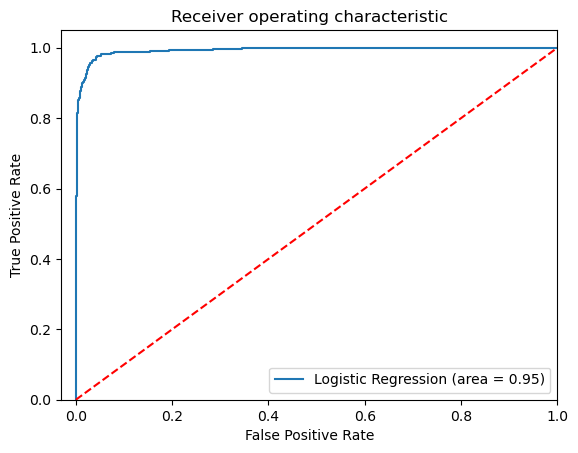

<Figure size 1000x800 with 0 Axes>

In [118]:
#calculating ROC_AUC and Plotting the same
logit_roc_auc_tgbm = roc_auc_score(y_test_gbm, gbm_tuned.predict(x_test_gbm))
fpr, tpr, thresholds = roc_curve(y_test_gbm, gbm_tuned.predict_proba(x_test_gbm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_tgbm)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.figure(figsize=(10,8))
plt.savefig('Log_ROC')
plt.show()

<bound method NDFrame.head of                               Importance
bad_credit_score_basic          0.001719
good_credit_score_premium       0.002365
good_credit_score_regular       0.002651
average_credit_score_premium    0.003639
Mailed                          0.005245
multiple_lines                  0.005500
with_tech_support               0.006677
Electronic                      0.007238
single_lines                    0.007576
average_credit_score_regular    0.008359
bad_credit_score_premium        0.008496
PhoneService                    0.009207
wo_online_bkp                   0.009872
two_year                        0.010815
gender                          0.011097
mannual_payment                 0.013761
dsl                             0.016636
fiber_optic                     0.078642
tenure                          0.126566
EstimatedSalary                 0.216099
TotalCharges                    0.221737
month_to_month                  0.226101>


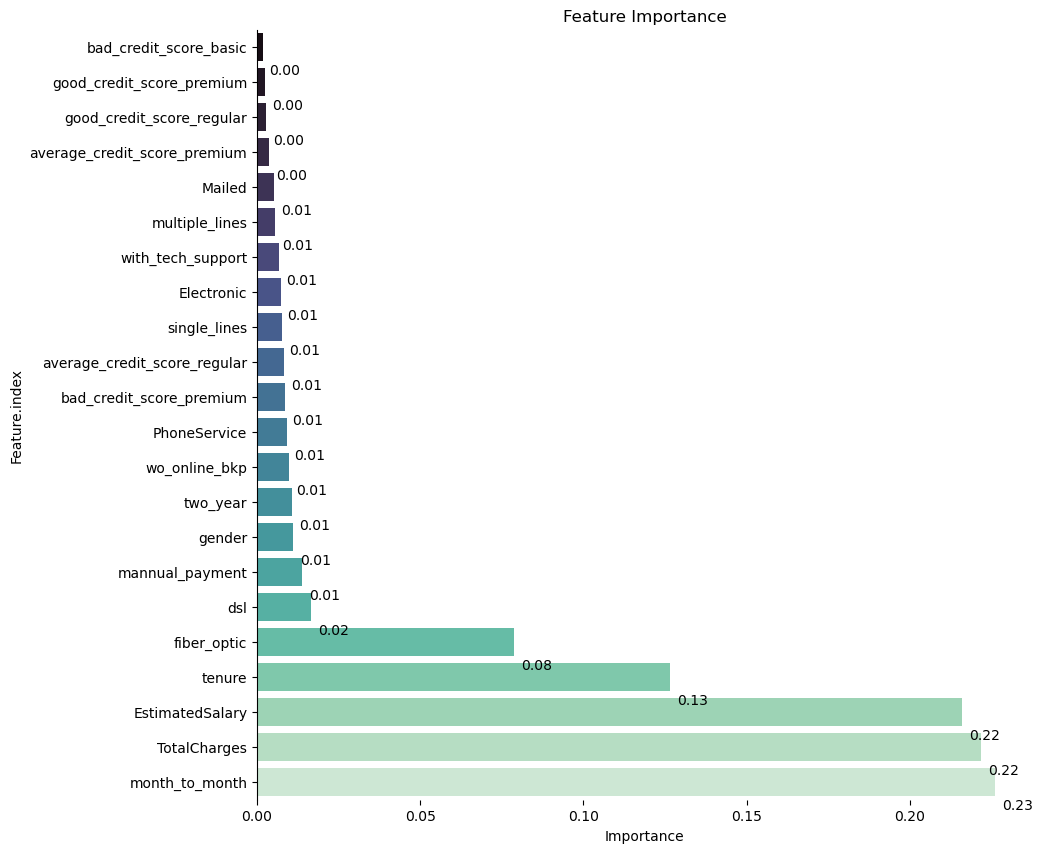

In [119]:
# Create a dataframe of feature importance
features_tgbm = pd.DataFrame(gbm_tuned.feature_importances_, os_data_x_gbm.columns, columns=['Importance'])

# Sort the DataFrame by importance in descending order
features_tgbm = features_tgbm.sort_values('Importance', ascending=True)

# Print the top 10 features by importance
print(features_tgbm.head)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = features_tgbm,
                 x       = 'Importance',
                 y       = features_tgbm.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -30), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(features_tgbm)))
ax.set_yticklabels(features_tgbm.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature.index')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

# Model Comparision

In [120]:
# Compare results
print(f"""

======================================== Model Comparison ========================================



Model           Train Acc.   Test Acc.     Gap         AUC Score    TN,  FP, FN,  TP
-----           ----------   ---------     ------      ---------    ----------------
Logistic        {LR_train_score}       {LR_test_score}        {LR_test_gap}      {LR_auc_score}       {LR_tn, LR_fp, LR_fn, LR_tp}
Decision Tree   {baseTree_train_score}       {baseTree_test_score}        {baseTree_test_gap}      {baseTree_auc_score}       {baseTree_tn, baseTree_fp, baseTree_fn, baseTree_tp}
Random Forest   {rf_train_score}       {rf_test_score}        {rf_test_gap}      {rf_auc_score}       {rf_tn, rf_fp, rf_fn, rf_tp}
Tuned RF        {rf_tuned_train_score}       {rf_tuned_test_score}        {rf_tuned_test_gap}      {rf_tuned_auc_score}       {rf_tuned_tn, rf_tuned_fp, rf_tuned_fn, rf_tuned_tp}
GBM             {gbm_default_train_score}       {gbm_default_test_score}        {gbm_default_test_gap}      {gbm_default_auc_score}       {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
Tuned GBM       {gbm_tuned_train_score}       {gbm_tuned_test_score}        {gbm_tuned_test_gap}      {gbm_tuned_auc_score}       {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}         



     /-----------------------------------------------------------------------------------\\
     | Tuned GBM is the best model with an AUC of {gbm_tuned_auc_score} and a train-test gap of {gbm_tuned_test_gap}  |
     \\-----------------------------------------------------------------------------------/


""")




======================================== Model Comparison ========================================



Model           Train Acc.   Test Acc.     Gap         AUC Score    TN,  FP, FN,  TP
-----           ----------   ---------     ------      ---------    ----------------
Logistic        0.8098       0.7666        0.0432      0.7483       (1164, 318, 145, 357)
Decision Tree   0.7747       0.7525        0.0222      0.7507       (1118, 364, 127, 375)
Random Forest   0.8515       0.7591        0.0924      0.7597       (1124, 358, 120, 382)
Tuned RF        0.8616       0.7722        0.0894      0.7614       (1145, 315, 137, 387)
GBM             0.8616       0.7959        0.0657      0.7494       (1238, 222, 183, 341)
Tuned GBM       0.8111       0.9637        0.1526      0.9515       (1427, 33, 39, 485)         



     /-----------------------------------------------------------------------------------\
     | Tuned GBM is the best model with an AUC of 0.9515 and a train-test gap of 0.15